In [5]:
pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 6.1 MB/s eta 0:00:00


In [6]:
import gym
from gym import spaces
from gym.spaces import Discrete
from gym.utils import seeding
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import colors



class RandomMaze(gym.Env):
    def __init__(self):
        #initialising different states in the maze environment
        self.start_state = int(8)
        self.goal = int(3)
        self.hole = int(7)
        self.state = int(8)
        #defining the transition matrix which contains the probability,next state, reward and isTerminal or not
        self.transition_matrix = {
            0: {
                0: [(0.8, 0, -0.04, False), (0.1, 0, -0.04, False), (0.1, 4, -0.04, False)],
                1: [(0.8, 0, -0.04, False), (0.1, 0, -0.04, False), (0.1, 1, -0.04, False)],
                2: [(0.8, 1, -0.04, False), (0.1, 0, -0.04, False), (0.1, 4, -0.04, False)],
                3: [(0.8, 4, -0.04, False), (0.1, 0, -0.04, False), (0.1, 1, -0.04, False)],
            },
            1: {
                0: [(0.8, 0, -0.04, False), (0.1, 1, -0.04, False), (0.1, 1, -0.04, False)],
                1: [(0.8, 1, -0.04, False), (0.1, 0, -0.04, False), (0.1, 2, -0.04, False)],
                2: [(0.8, 2, -0.04, False), (0.1, 1, -0.04, False), (0.1, 1, -0.04, False)],
                3: [(0.8, 1, -0.04, False), (0.1, 0, -0.04, False), (0.1, 2, -0.04, False)],
            },
            2: {
                0: [(0.8, 1, -0.04, False), (0.1, 2, -0.04, False), (0.1, 6, -0.04, False)],
                1: [(0.8, 2, -0.04, False), (0.1, 1, -0.04, False), (0.1, 3, +1, True)],
                2: [(0.8, 3, +1, True), (0.1, 2, -0.04, False), (0.1, 6, -0.04, False)],
                3: [(0.8, 6, -0.04, False), (0.1, 1, -0.04, False), (0.1, 3, +1, True)],
            },
            3: {
                0: [(0.8, 3, 0, True), (0.1, 3, 0, True), (0.1, 3, 0, True)],
                1: [(0.8, 3, 0, True), (0.1, 3, 0, True), (0.1, 3, 0, True)],
                2: [(0.8, 3, 0, True), (0.1, 3, 0, True), (0.1, 3, 0, True)],
                3: [(0.8, 3, 0, True), (0.1, 3, 0, True), (0.1, 3, 0, True)],
            },
            4: {
                0: [(0.8, 4, -0.04, False), (0.1, 0, -0.04, False), (0.1, 8, -0.04, False)],
                1: [(0.8, 0, -0.04, False), (0.1, 4, -0.04, False), (0.1, 4, -0.04, False)],
                2: [(0.8, 4, -0.04, False), (0.1, 0, -0.04, False), (0.1, 8, -0.04, False)],
                3: [(0.8, 8, -0.04, False), (0.1, 4, -0.04, False), (0.1, 4, -0.04, False)],
            },
            6: {
                0: [(0.8, 6, -0.04, False), (0.1, 2, -0.04, False), (0.1, 10, -0.04, False)],
                1: [(0.8, 2, -0.04, False), (0.1, 6, -0.04, False), (0.1, 7, -1, True)],
                2: [(0.8, 7, -1, True), (0.1, 2, -0.04, False), (0.1, 10, -0.04, False)],
                3: [(0.8, 10, -0.04, False), (0.1, 6, -0.04, False), (0.1, 7, -1, True)],
            },
            7: {
                0: [(0.8, 7, 0, True), (0.1, 7, 0, True), (0.1, 7, 0, True)],
                1: [(0.8, 7, 0, True), (0.1, 7, 0, True), (0.1, 7, 0, True)],
                2: [(0.8, 7, 0, True), (0.1, 7, 0, True), (0.1, 7, 0, True)],
                3: [(0.8, 7, 0, True), (0.1, 7, 0, True), (0.1, 7, 0, True)],
            },
            8: {
                0: [(0.8, 8, -0.04, False), (0.1, 8, -0.04, False), (0.1, 4, -0.04, False)],
                1: [(0.8, 4, -0.04, False), (0.1, 8, -0.04, False), (0.1, 9, -0.04, False)],
                2: [(0.8, 9, -0.04, False), (0.1, 8, -0.04, False), (0.1, 4, -0.04, False)],
                3: [(0.8, 8, -0.04, False), (0.1, 8, -0.04, False), (0.1, 9, -0.04, False)],
            },
            9: {
                0: [(0.8, 8, -0.04, False), (0.1, 9, -0.04, False), (0.1, 9, -0.04, False)],
                1: [(0.8, 9, -0.04, False), (0.1, 8, -0.04, False), (0.1, 10, -0.04, False)],
                2: [(0.8, 10, -0.04, False), (0.1, 9, -0.04, False), (0.1, 9, -0.04, False)],
                3: [(0.8, 9, -0.04, False), (0.1, 8, -0.04, False), (0.1, 10, -0.04, False)]
            },
            10: {
                0: [(0.8, 9, -0.04, False), (0.1, 6, -0.04, False), (0.1, 10, -0.04, False)],
                1: [(0.8, 6, -0.04, False), (0.1, 9, -0.04, False), (0.1, 11, -0.04, False)],
                2: [(0.8, 11, -0.04, False), (0.1, 6, -0.04, False), (0.1, 10, -0.04, False)],
                3: [(0.8, 10, -0.04, False), (0.1, 9, -0.04, False), (0.1, 11, -0.04, False)]
            },
            11: {
                0: [(0.8, 10, -0.04, False), (0.1, 7, -1, True), (0.1, 11, -0.04, False)],
                1: [(0.8, 7, -1, True), (0.1, 10, -0.04, False), (0.1, 11, -0.04, False)],
                2: [(0.8, 11, -0.04, False), (0.1, 7, -1, True), (0.1, 11, -0.04, False)],
                3: [(0.8, 11, -0.04, False), (0.1, 11, -0.04, False), (0.1, 10, -0.04, False)]
            }
        }

    #Generating the seeds

    def seed(self, seed):
        np.random.seed(seed)
        return seed
    #defining the step function that the agent takes
    def step(self, action):
        act = np.random.choice([0, 1, 2], p=[0.8, 0.1, 0.1])
        trans = self.transition_matrix[int(self.state)][int(action)][int(act)]
        prob = trans[0]
        self.state = int(trans[1])
        reward = trans[2]
        is_Terminal = trans[3]
        return self.state, reward, is_Terminal, {}
    #Resetting the environment and the agent starts from state 8
    def reset(self):
        self.state = int(8)
        return self.state, False
     #rendering the environment
    def render(self):
        fig, ax = plt.subplots()
        draw_maze = np.copy(self.rand_maze)

        for step in self.state_history:
            draw_maze[step // self.no_cols, step % self.no_cols] = 4
        cmap = colors.ListedColormap(['white', 'black', 'green', 'blue', 'yellow'])

        ax.matshow(draw_maze, cmap=cmap)

    def close(self):
      pass

In [7]:
#These are the implementations of the functions that are used in the algorithms implementations below :
#Implementing the decayLearning rate function
def decayLearningRate(alpha, e, noEpisodes, alpha_final=0.01):
    rate = (alpha_final/alpha)
    pow = ((e+1)/noEpisodes)
    decalp = alpha*rate** pow
    return  decalp
#Implementing the decay epsilon function
def decayEpsilon(epsilon, e, noEpisodes, epsilon_final=0.1, decay='linear'):
    if decay == 'exp':
        rate = (epsilon_final/epsilon)
        pow = ((e+1)*2/noEpisodes)
        eps_dec = epsilon*rate**pow
        return eps_dec
    else:
        rate = (epsilon_final-epsilon)
        denom = (noEpisodes-1)
        lin =  epsilon + e*rate/denom
        return lin
#Implementing the trajectory generation function :
def generateTrajectory(env, Q, epsilon, maxSteps):
    s, terminal = env.reset()
    trajectory = []
    for step in range(maxSteps):
        s = env.state
        if np.random.rand() < epsilon:
            a = np.random.randint(len(env.transition_matrix[s]))
        else:
            a = np.argmax(Q[s])
        s_, r, terminal, _ = env.step(a)
        trajectory.append((s, a, r, s_))
        if terminal:
            break
    return trajectory
#Implementing the Greedy Policy that is full exploitation policy
def GreedyPolicy(Q):
    policy = np.zeros(len(Q))
    for state in range(len(Q)):
        policy[state] = np.argmax(Q[state])
    return policy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
import matplotlib.pyplot as plt
env = RandomMaze()
#implementing the value iteration algorithm
def valueIteration(env, gamma=0.99, theta=10**-7):
    v = np.zeros(len(env.transition_matrix.keys())+1)
    pi = np.zeros(len(env.transition_matrix.keys())+1)
    env.reset()
    count = 0
    Q = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    while True:
        count += 1
        Q = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
        for state in env.transition_matrix.keys():
            for action in env.transition_matrix[state].keys():
                for p,next_state,reward,terminal in env.transition_matrix[state][action]:
                        l = (reward + gamma * v[next_state])
                        Q[state][action] += p *l
        if max(np.abs(v-np.max(Q,axis=1))) < theta:
            print("Number of steps taken is : ", count, "iterations")
            break
        v = np.max(Q, axis=1)
    pi = GreedyPolicy(Q)
    return v,pi

v,pi = valueIteration(env, gamma=0.99, theta=10**-7)
print(v)

Number of steps taken is :  29 iterations
[0.82442985 0.89286374 0.95464233 0.         0.76427486 0.
 0.68820946 0.         0.69763943 0.63906528 0.60613368 0.38186216]


In [9]:
#Code for the plots

def plot(state_value, q_value):
    # Hard coding the true values from the Value iteration
    value = [0.82442985, 0.89286374, 0.95464233, 0.0, 0.76427486, 0.,
             0.68820946, 0.0, 0.69763943, 0.63906528, 0.60613368, 0.38186216]
    no_of_episodes = q_value.shape[0]
    no_of_states = q_value.shape[1]
    no_of_actions = q_value.shape[2]

    fig, ax = plt.subplots(figsize=(10, 6))
    fig.set_facecolor('cyan')
    fig.suptitle('State-Value Function vs Episodes', fontsize=16, color='blue')

    for state in range(no_of_states):
        # Checking if the current state is not in the excluded states
        if state not in [3, 5, 7]:
            ax.plot(np.arange(no_of_episodes), state_value[:, state], label='State {}'.format(state))

    # Adjusting the true value array to match the length of the plotted values
    filtered_value = [value[state] for state in range(len(value)) if state not in [3, 5, 7]]
    filtered_value *= no_of_episodes // (no_of_states - 3)


    if len(filtered_value) < no_of_episodes:
        filtered_value.extend([filtered_value[-1]] * (no_of_episodes - len(filtered_value)))

    # Plotting the adjusted true values
    ax.plot(np.arange(no_of_episodes), filtered_value, 'k--', label='True Value',alpha = 0.5)
    ax.legend()
    ax.set_xlabel('Episodes')
    ax.set_ylabel('State Value')
    plt.show()

    fig, ax = plt.subplots(nrows=3, ncols=4)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    fig.set_facecolor('cyan')
    fig.suptitle('Q function for actions vs Episodes', fontsize=16, color='blue')

    # Setting the  colors for the four actions
    action_colors = ['red', 'green', 'blue', 'orange']

    for row in range(3):
        for col in range(4):
            state = row * 4 + col
            # Check if the current state is not in the excluded states
            if state not in [3, 5, 7]:
                ax[row, col].set_title('State: {}'.format(state))
                for action in range(no_of_actions):
                    ax[row, col].plot(np.arange(no_of_episodes), q_value[:, state, action],
                                      label='Action: {}'.format(action), color=action_colors[action])
                    ax[row, col].plot(np.arange(no_of_episodes), value[state] * np.ones(no_of_episodes))
            else:
                ax[row, col].axis('off')  # Turn off axis for excluded states

    plt.legend()
    plt.show()



def plotValueFunction(state_value):
    fig, ax = plt.subplots()
    fig.suptitle('Value Function')
    ax.matshow(np.reshape(state_value[-1], (3,4)), cmap='plasma')
    for i in range(3):
        for j in range(4):
            ax.text(j, i, np.round(np.reshape(state_value[-1], (3,4))[i][j],3), va='center', ha='center', color='red', size='xx-large')
            ax.plot([j-0.5, j+0.5], [i+0.5, i+0.5], color='white', lw=1)
            ax.plot([j+0.5, j+0.5], [i-0.5, i+0.5], color='white', lw=1)
    plt.axis('off')
    plt.show()


def plotPolicy(policy):
    fig, ax = plt.subplots()
    fig.suptitle('Optimal Policy')
    maze = np.zeros(12)
    maze[3] = 1
    maze[7] = -1
    maze[5] = 0.5
    ax.matshow(np.reshape(maze, (3,4)), cmap='plasma')
    for i in range(3):
        for j in range(4):
            state = i*4 + j
            if policy[state] == 0:
                ax.text(j, i, '←', va='center', ha='center', color='blue', size='xx-large')
            elif policy[state] == 1:
                ax.text(j, i,  '↑', va='center', ha='center', color='green', size='xx-large')
            elif policy[state] == 2:
                ax.text(j, i, '→', va='center', ha='center', color='orange', size='xx-large')
            elif policy[state] == 3:
                ax.text(j, i, '↓', va='center', ha='center', color='purple', size='xx-large')
            ax.plot([j-0.5, j+0.5], [i+0.5, i+0.5], color='white', lw=1)
            ax.plot([j+0.5, j+0.5], [i-0.5, i+0.5], color='white', lw=1)
    plt.axis('off')
    plt.show()



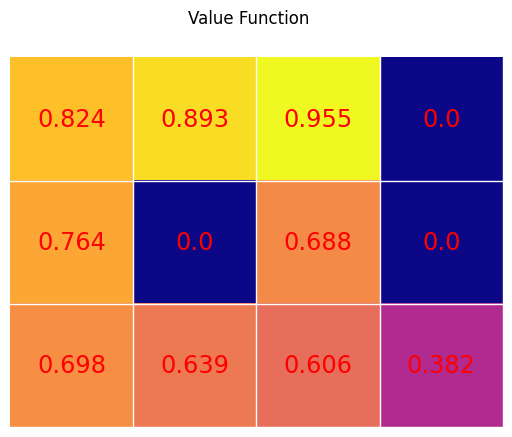

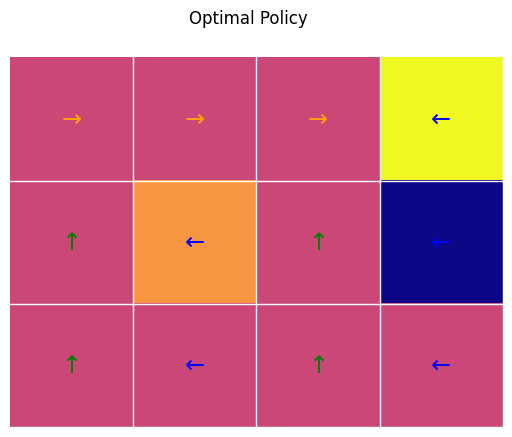

In [ ]:
#Printing the V-function and policy
plotValueFunction([v])
plotPolicy(pi)

In [10]:
def param(instances, method, average=True, **kwargs):
    # seed the environments with the same set of seeds for every experiment run
    seeds = np.arange(instances)

    s_values = []
    q_values = []
    policy = []

    for i in tqdm(range(instances)):
        env = RandomMaze()
        env.seed(seeds[i])
        state_values, qu_values, opt_policy = method(env, **kwargs)
        s_values.append(state_values)
        q_values.append(qu_values)
        policy.append(opt_policy)

    if average:
        STATE_VALUE = np.mean(s_values, axis=0)
        Q_VALUE = np.mean(q_values, axis=0)
        OPTIMAL_POLICY = GreedyPolicy(Q_VALUE[-1])
        return STATE_VALUE, Q_VALUE, OPTIMAL_POLICY
    else:
        return s_values, q_values, policy


In [11]:
def monte_carlo_control(env, gamma, alpha, epsilon, maxSteps, noEpisodes, firstVisit = True):
    Q = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q_est = np.zeros((noEpisodes, len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))

    for e in range(noEpisodes):
        #calling the decayLearningRate and decayEpsilon functions
        alpha_e = decayLearningRate(alpha, e, noEpisodes)
        epsilon_e = decayEpsilon(epsilon, e, noEpisodes)
        #calling the generate trajectory function
        t = generateTrajectory(env, Q, epsilon_e, maxSteps)
        visited = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))

        for i, (s,a,r, s_) in enumerate(t):
            if visited[s][a] and firstVisit:
                continue
            visited[s][a] = 1
            G = 0
            for j in range(i, len(t)):
                p = (j-i)
                G += gamma**p * t[j][2]
            Q[s][a] = Q[s][a] + alpha_e * (G - Q[s][a])
        Q_est[e] = Q
    state_value = np.max(Q_est, axis=2)
    q_value = Q_est
    #calling the pure exploration strategy function
    optimal_policy = GreedyPolicy(q_value[-1])

    return state_value, q_value, optimal_policy

In [12]:
from tqdm import tqdm

state_value, q_value, optimal_policy = param(instances=20, method=monte_carlo_control, average=True, gamma=0.99, alpha=0.08, epsilon=0.3, maxSteps=80, noEpisodes=500, firstVisit=True)
print("the state values are :")
print(state_value)
print("the q_values are :")
print(q_value)
print("the optimal policy is : ")
print(optimal_policy)

100%|██████████| 20/20 [00:09<00:00,  2.15it/s]

the state values are :
[[-4.22810655e-02  0.00000000e+00  0.00000000e+00 ... -1.59335960e-04
   0.00000000e+00  0.00000000e+00]
 [-6.90170611e-02 -2.01529522e-03  1.98343346e-02 ... -3.66680321e-02
  -1.11695729e-02  0.00000000e+00]
 [-8.38611826e-02  1.76152167e-04  4.25800483e-02 ... -6.69953741e-02
  -1.96112034e-02  2.98235807e-03]
 ...
 [ 7.56441660e-01  8.55328567e-01  9.34940113e-01 ...  3.57341498e-01
   1.53857299e-01 -9.15925167e-02]
 [ 7.56805993e-01  8.55766485e-01  9.35468405e-01 ...  3.58010014e-01
   1.54043643e-01 -9.15925167e-02]
 [ 7.56583235e-01  8.55313448e-01  9.35869451e-01 ...  3.57253149e-01
   1.53262100e-01 -9.15925167e-02]]
the q_values are :
[[[-0.12199212 -0.08500238 -0.07861872 -0.07342872]
  [-0.06461916 -0.01989977 -0.00629367 -0.01216576]
  [-0.0061963   0.          0.         -0.00433833]
  ...
  [-0.1040688  -0.03599    -0.02061138 -0.00304562]
  [-0.0129288  -0.00858467  0.         -0.00865816]
  [ 0.          0.          0.          0.        ]]

 [

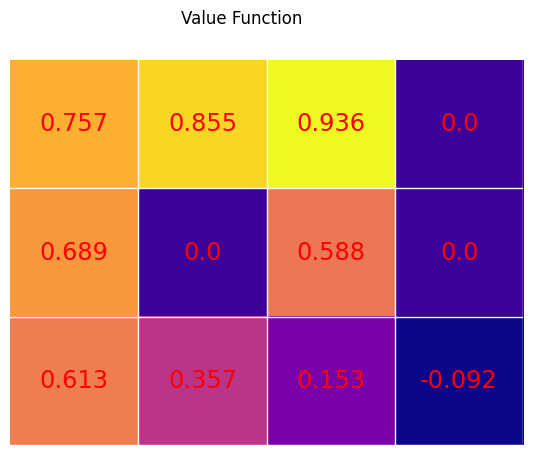

In [ ]:
#Plotting the state value
plotValueFunction(state_value)

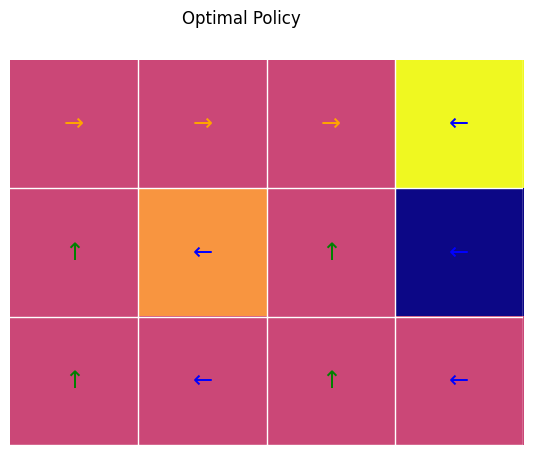

In [ ]:
#plotting the optimal policy
plotPolicy(optimal_policy)

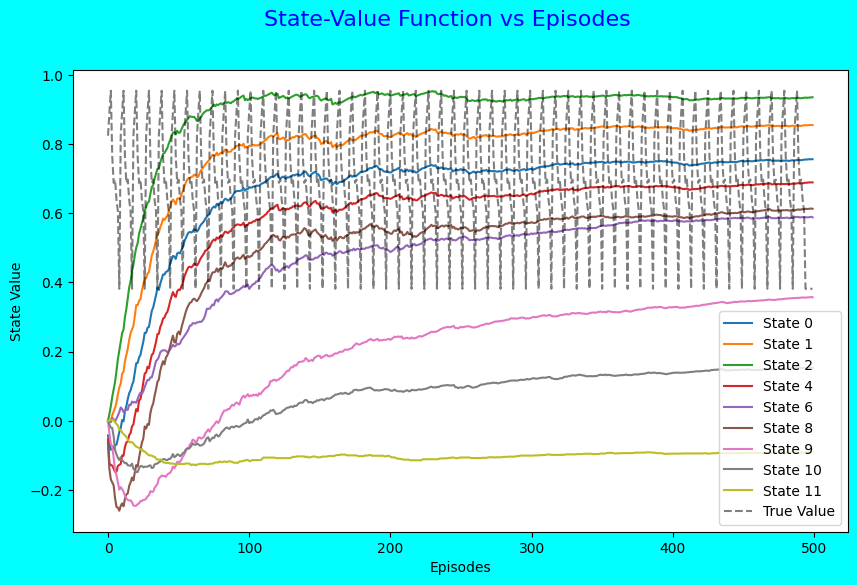

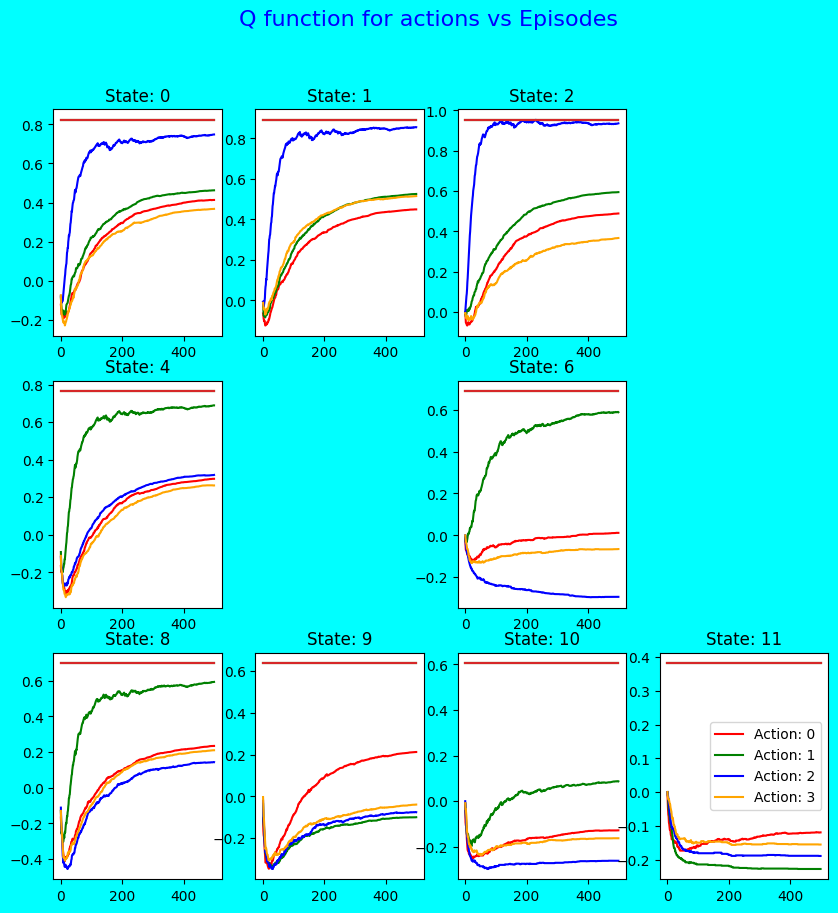

In [ ]:
#plotting the V and Q function
plot(state_value, q_value)

Problem 2


In [13]:
def actionSelect(s, Q, epsilon):

    if np.random.rand() < epsilon:
        return np.random.randint(len(Q[s]))
    else:
        return np.argmax(Q[s])

In [ ]:
# SARSA algorithm
def sarsa(env, gamma, alpha, epsilon, noEpisodes):
    Q = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q_est = np.zeros((noEpisodes, len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))

    for e in range(noEpisodes):
        #Calling the decay epsilon and decay learning rate functions
        epsilon_e = decayEpsilon(epsilon, e, noEpisodes)
        alpha_e = decayLearningRate(alpha, e, noEpisodes)
        s, terminal = env.reset()
        #calling the action selection function
        act = actionSelect(s, Q, epsilon_e)
        terminal = False
        while not terminal:
            s_, r, terminal, _ = env.step(act)
            a_ = actionSelect(s_, Q, epsilon_e)
            td_target = r
            if not terminal:
                td_target += gamma * Q[s_][a_]
            td_error = td_target - Q[s][act]
            Q[s][act] += alpha_e*td_error
            s = s_
            act = a_
        Q_est[e] = Q
    state_value = np.max(Q_est, axis=2)
    q_value = Q_est
    optimal_policy = GreedyPolicy(q_value[-1])

    return state_value, q_value, optimal_policy


In [ ]:

state_value, q_value, optimal_policy = param(20, sarsa, gamma=0.99, alpha=0.08, epsilon=0.3, noEpisodes=500)
print("the state values are :")
print(state_value)
print("the q_values are :")
print(q_value)
print("the optimal policy is : ")
print(optimal_policy)


100%|██████████| 20/20 [00:03<00:00,  5.54it/s]

the state values are :
[[-5.12920050e-03 -3.34062515e-03  3.92220342e-02 ... -2.57444420e-03
  -6.37343842e-04  0.00000000e+00]
 [-6.94040113e-03 -4.06347079e-03  6.53384340e-02 ... -5.74373986e-03
  -2.09308421e-03 -1.71189555e-04]
 [-8.89910994e-03 -4.22171230e-03  9.15969209e-02 ... -7.81452246e-03
  -3.31369922e-03 -4.87810425e-04]
 ...
 [ 6.13114569e-01  7.83839446e-01  9.24740822e-01 ...  1.48256581e-01
   1.91710996e-01 -4.85212752e-02]
 [ 6.13445318e-01  7.84116877e-01  9.24843768e-01 ...  1.48592716e-01
   1.91765296e-01 -4.90761873e-02]
 [ 6.13438220e-01  7.84062093e-01  9.25320146e-01 ...  1.48903179e-01
   1.91803473e-01 -4.89137042e-02]]
the q_values are :
[[[-7.33828928e-03 -7.98503369e-03 -7.29775958e-03 -6.16971736e-03]
  [-4.98573655e-03 -5.46458841e-03 -4.66639568e-03 -5.15935448e-03]
  [-3.39640082e-03  4.69716058e-03  2.27977363e-02  6.98664938e-03]
  ...
  [-4.83215309e-03 -4.43493605e-03 -4.30914329e-03 -3.51796496e-03]
  [-3.33229791e-03 -1.91190459e-03 -9.433217

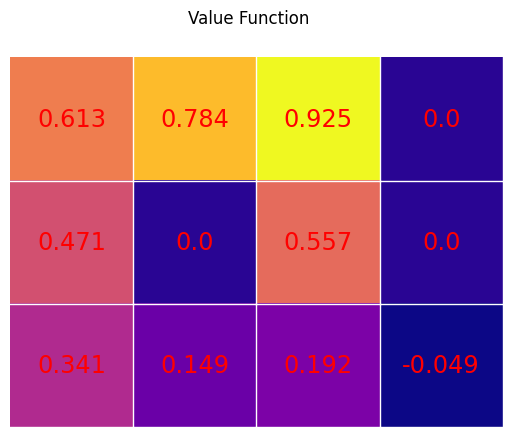

In [ ]:
#Plotting the state value
plotValueFunction(state_value)

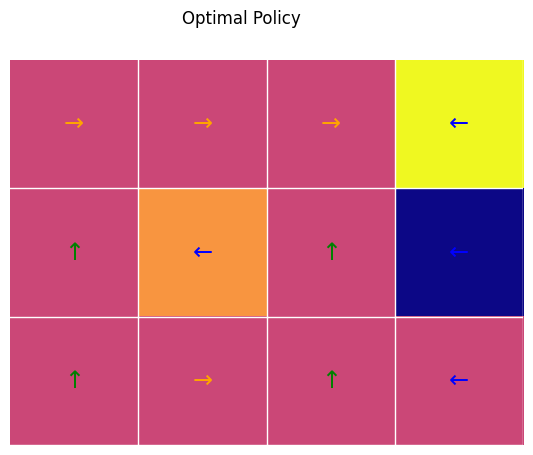

In [ ]:
#plotting the optimal policy
plotPolicy(optimal_policy)

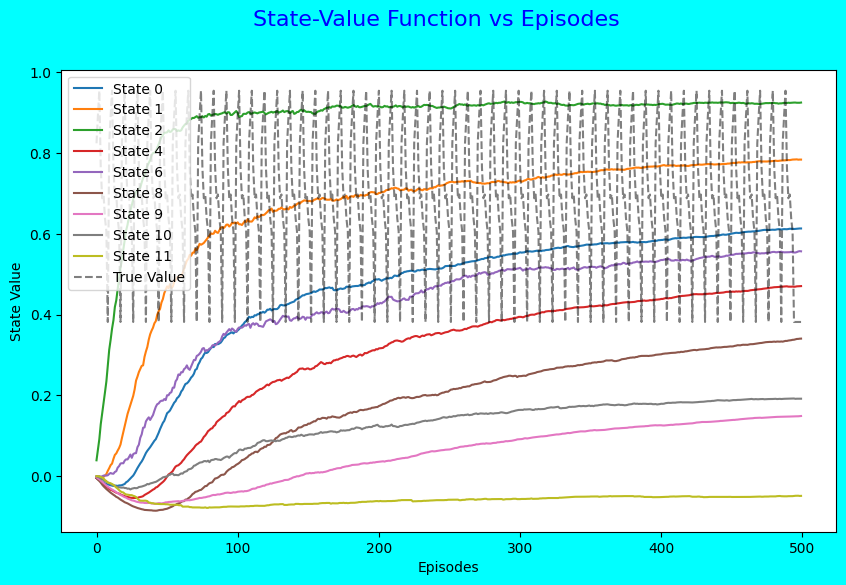

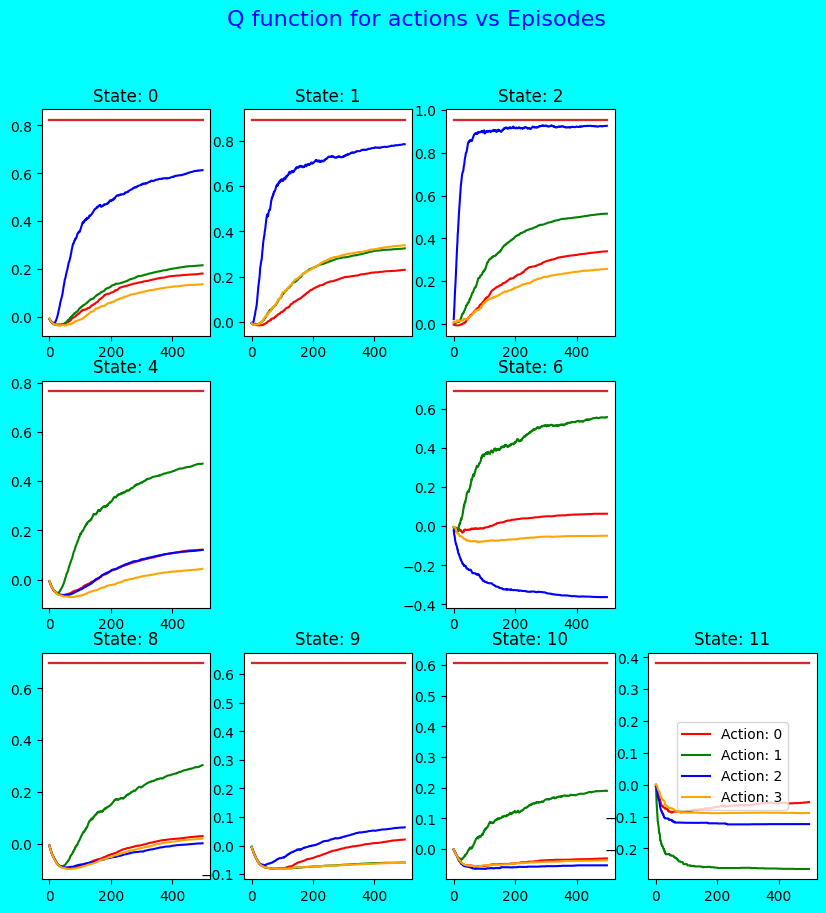

In [ ]:
#plotting the V and Q function
plot(state_value, q_value)

Problem 3

In [ ]:
# Q-Learning
def q_learning(env, gamma, alpha, epsilon, noEpisodes):
    Q = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q_est = np.zeros((noEpisodes, len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))

    for e in range(noEpisodes):
        #calling the decaylearning rate and decay epsilon functions
        alpha_e = decayLearningRate(alpha, e, noEpisodes)
        epsilon_e = decayEpsilon(epsilon, e, noEpisodes)
        s, terminal = env.reset()
        terminal = False
        while not terminal:
            #calling the action selection algorithm
            a = actionSelect(s, Q, epsilon_e)
            s_, r, terminal, _ = env.step(a)
            td_target = r
            if not terminal:
                td_target += gamma * np.max(Q[s_])
            td_error = td_target - Q[s][a]
            Q[s][a] += alpha_e*td_error
            s = s_
        Q_est[e] = Q
    state_value = np.max(Q_est, axis=2)
    q_value = Q_est
    optimal_policy = GreedyPolicy(q_value[-1])

    return state_value, q_value, optimal_policy

In [ ]:

state_value, q_value, optimal_policy = param(20, q_learning, gamma=0.99, alpha=0.08, epsilon=0.3, noEpisodes=500)

print("the state values are :")
print(state_value)
print("the q_values are :")
print(q_value)
print("the optimal policy is : ")
print(optimal_policy)


100%|██████████| 20/20 [00:04<00:00,  4.48it/s]

the state values are :
[[-3.94350105e-03 -2.49775144e-03  4.33647692e-02 ... -2.40209868e-03
  -6.24649868e-04  0.00000000e+00]
 [-6.61645062e-03 -3.29393166e-03  6.80381646e-02 ... -6.70894688e-03
  -2.83585069e-03 -3.17223466e-04]
 [-8.74078042e-03 -3.06772454e-03  1.01416661e-01 ... -9.13238529e-03
  -4.33588911e-03 -1.26519545e-03]
 ...
 [ 8.02141225e-01  8.86979907e-01  9.48834142e-01 ...  3.70116651e-01
   3.58933177e-01 -3.38891993e-03]
 [ 8.01963454e-01  8.87028509e-01  9.48996505e-01 ...  3.70288980e-01
   3.59374081e-01 -3.38891993e-03]
 [ 8.01836901e-01  8.87087530e-01  9.49108340e-01 ...  3.70335990e-01
   3.59738995e-01 -3.38891993e-03]]
the q_values are :
[[[-5.09567560e-03 -5.00634561e-03 -5.61344362e-03 -4.28490443e-03]
  [-4.55204040e-03 -3.65037189e-03 -3.60304126e-03 -2.66940065e-03]
  [-1.99999075e-03 -1.77777086e-03  3.93813702e-02  2.84505175e-03]
  ...
  [-4.50994605e-03 -4.06553877e-03 -4.42019495e-03 -3.18346766e-03]
  [-2.58569446e-03 -2.52386048e-03 -1.690237

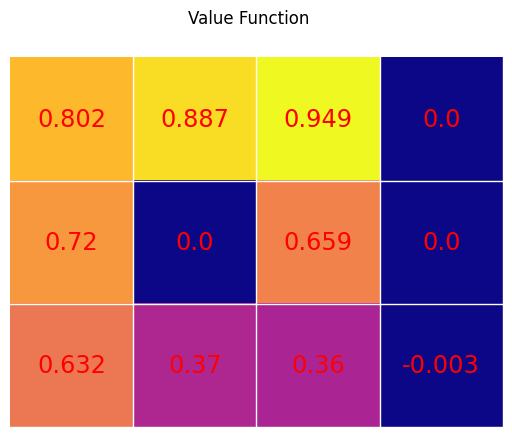

In [ ]:
#Plotting the state value
plotValueFunction(state_value)

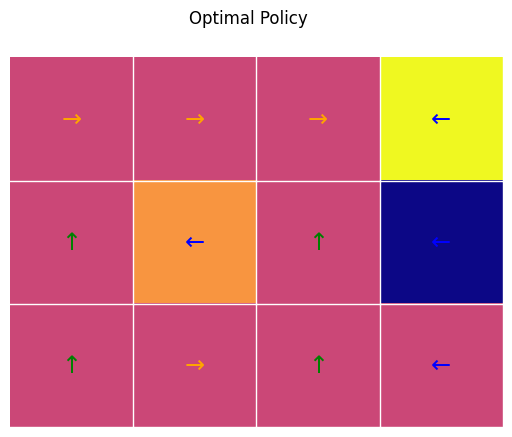

In [ ]:
#plotting the optimal policy
plotPolicy(optimal_policy)

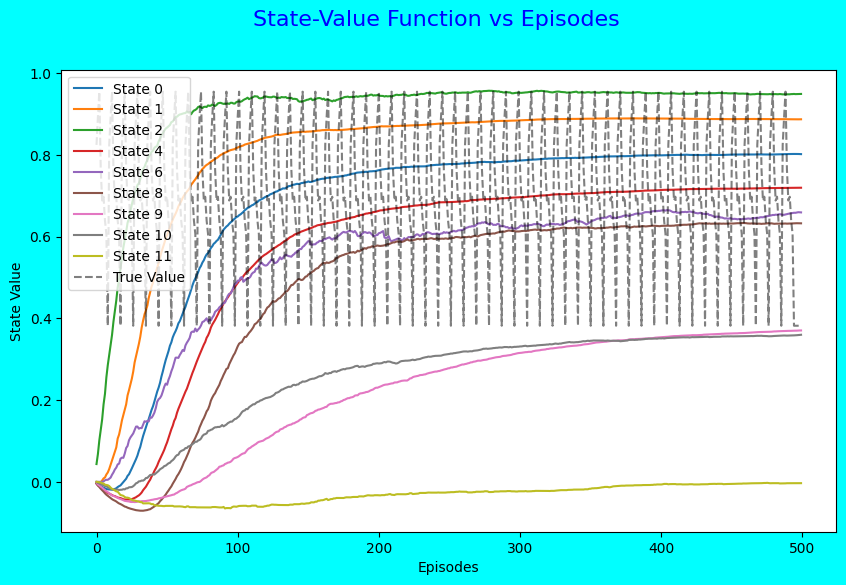

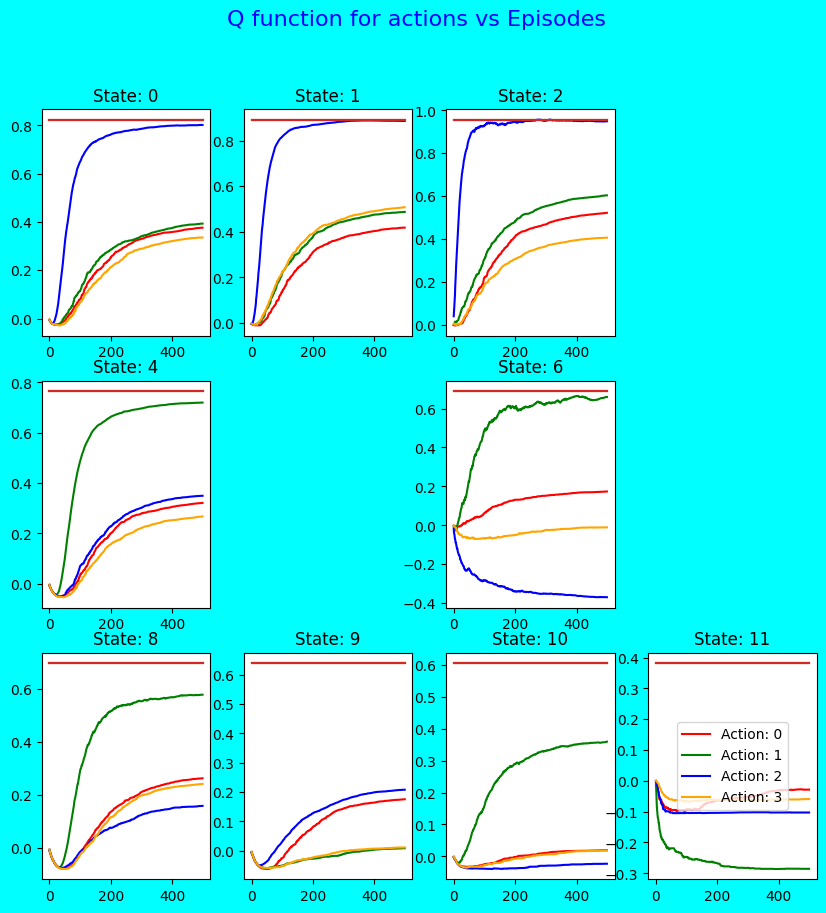

In [ ]:
#plotting the V and Q function
plot(state_value, q_value)

Problem4

In [ ]:
# Double Q-Learning
def double_q_learning(env, gamma, alpha, epsilon, noEpisodes):
    #Need to asign two Q tables extra in double Q learning that is Q1 and Q2
    Q = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q_est = np.zeros((noEpisodes, len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q1 = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q1_est = np.zeros((noEpisodes, len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q2 = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q2_est = np.zeros((noEpisodes, len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))

    for e in range(noEpisodes):
        #calling the decay learning rate and decay epsilon
        alpha_e = decayLearningRate(alpha, e, noEpisodes)
        epsilon_e = decayEpsilon(epsilon, e, noEpisodes)
        s, terminal = env.reset()
        terminal = False
        while not terminal:
            #calling the action selection function
            a = actionSelect(s, Q, epsilon_e)
            s_, r, terminal, _ = env.step(a)

            if np.random.randint(2):
                a1 = np.random.choice(np.flatnonzero(np.isclose(Q1[s_], np.max(Q1[s_]))))
                td_target = r
                if not terminal:
                    td_target += gamma * Q2[s_][a1]
                td_error = td_target - Q1[s][a]
                Q1[s][a] += alpha_e*td_error
            else:
                a2 = np.random.choice(np.flatnonzero(np.isclose(Q2[s_], np.max(Q2[s_]))))
                td_target = r
                if not terminal:
                    td_target += gamma * Q1[s_][a2]
                td_error = td_target - Q2[s][a]
                Q2[s][a] += alpha_e*td_error
            s = s_
        Q1_est[e] = Q1
        Q2_est[e] = Q2
        Q = (Q1 + Q2)/2
        Q_est[e] = Q

    state_value = np.max(Q_est, axis=2)
    q_value = Q_est
    optimal_policy = GreedyPolicy(q_value[-1])

    return state_value, q_value, optimal_policy

In [ ]:


state_value, q_value, optimal_policy = param(10, double_q_learning, gamma=0.99, alpha=0.08, epsilon=0.3, noEpisodes=500)

print("the state values are :")
print(state_value)
print("the q_values are :")
print(q_value)
print("the optimal policy is : ")
print(optimal_policy)


100%|██████████| 10/10 [00:14<00:00,  1.44s/it]

the state values are :
[[-4.30358190e-02 -7.40937960e-03  2.35817222e-02 ... -7.83138013e-03
  -1.59335960e-04  0.00000000e+00]
 [-4.38974955e-02 -8.93358688e-03  4.60864176e-02 ... -1.03264546e-02
  -4.76685314e-04  0.00000000e+00]
 [-4.42358899e-02 -9.36910384e-03  4.76530480e-02 ... -1.21884263e-02
  -1.89144676e-03 -4.87169891e-04]
 ...
 [ 6.82639888e-01  8.39746283e-01  9.44833538e-01 ...  1.47661609e-01
   2.68957767e-01 -4.23110253e-02]
 [ 6.82758808e-01  8.39758419e-01  9.45067017e-01 ...  1.48037648e-01
   2.69505407e-01 -4.21790879e-02]
 [ 6.82759640e-01  8.39815020e-01  9.45173243e-01 ...  1.48191074e-01
   2.69821193e-01 -4.21790879e-02]]
the q_values are :
[[[-8.13310530e-02 -5.61739930e-02 -4.34583539e-02 -6.62289180e-02]
  [-5.78882989e-02 -1.06405745e-02 -1.08997218e-02 -9.47048956e-03]
  [-1.22217649e-02  3.51808511e-03  1.95983231e-02 -9.94708045e-04]
  ...
  [-5.74677623e-02 -1.31800163e-02 -9.84131575e-03 -1.04419009e-02]
  [-1.14438811e-02 -1.42120273e-03 -1.115224

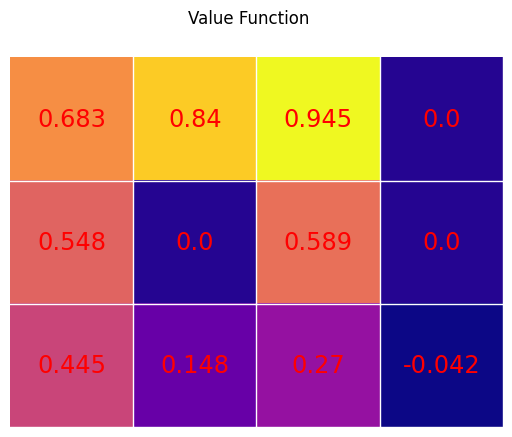

In [ ]:
#Plotting the state value
plotValueFunction(state_value)

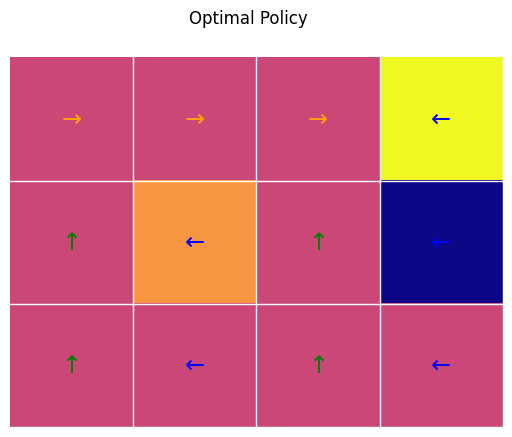

In [20]:
#plotting the optimal policy
plotPolicy(optimal_policy)

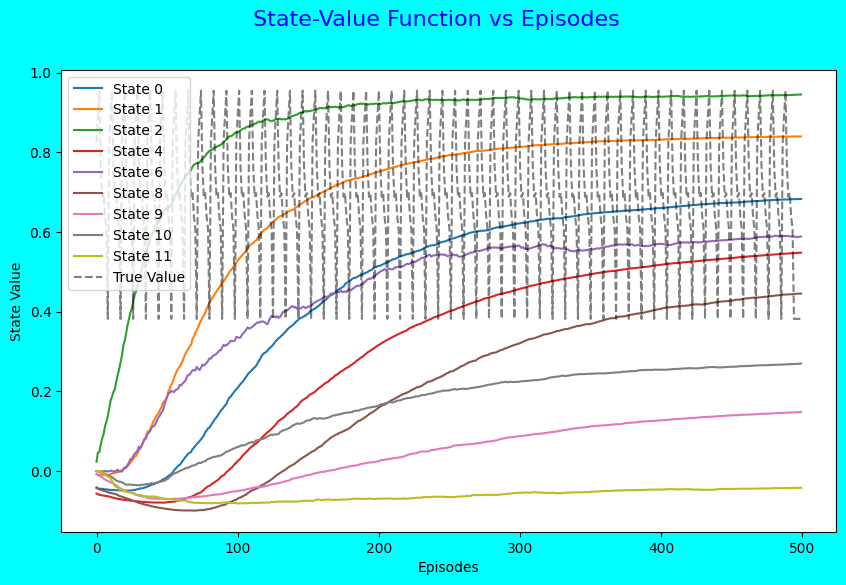

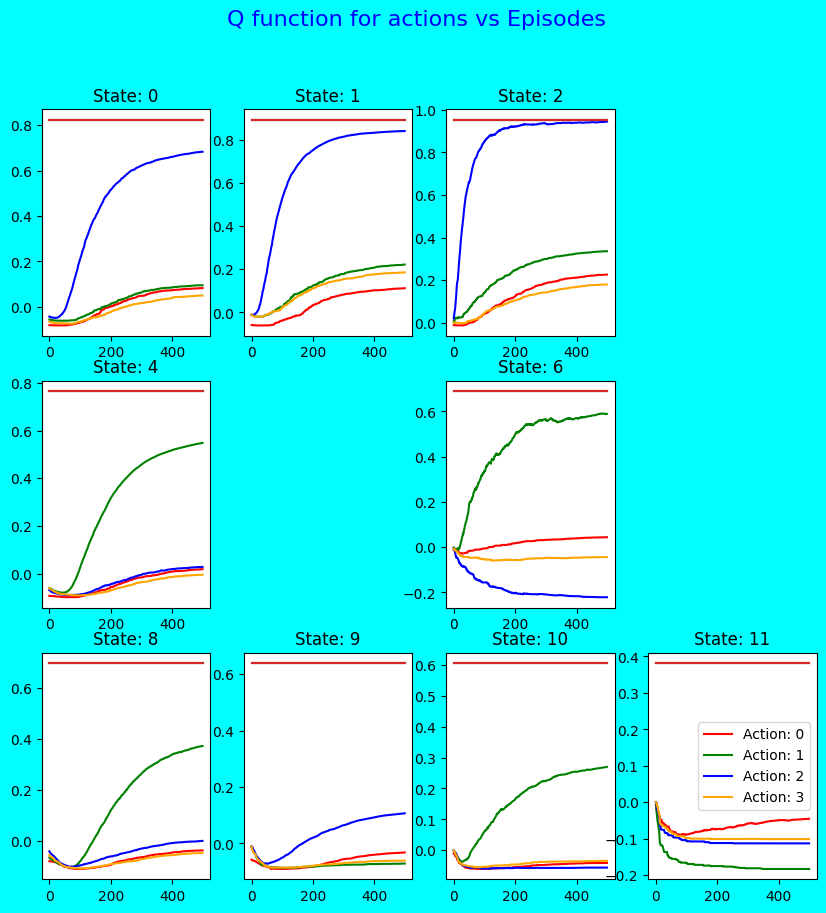

In [ ]:
#plotting the V and Q function
plot(state_value, q_value)

Problem 5

In [14]:
# run episodes with the policy passed as an argument and compute success rate
def get_policy_success_rate(env, current_policy, goal_state, maxEpisodes = 100, maxSteps = 200):
    count = 0
    for e in range(maxEpisodes):
        s, terminal = env.reset()
        for i in range(maxSteps):
            a = current_policy[s]
            s_, r, terminal, _ = env.step(a)
            if s_ == goal_state:
                count += 1
                break
            s = s_
    psr = count/maxEpisodes
    percentage = psr * 100

    return percentage

In [ ]:

def plot_policy_success_rate_togetherFIRST(instances=5, maxEpisodes=10, maxSteps=50, noEpisodes=250):

    env = RandomMaze()
    env.seed(35)
    policy_success_rates = np.zeros((instances, noEpisodes))

    plt.rcParams["figure.figsize"] = (20,5)

    #
    _, q_value, _ = param(instances, monte_carlo_control, average=False, gamma=0.99, alpha=0.05, epsilon=0.5, maxSteps=50, noEpisodes=noEpisodes, firstVisit=True)
    if q_value is not None:  # Check if q_value is None
        for i in tqdm(range(instances)):
            for e in range(noEpisodes):
                policy = GreedyPolicy(q_value[i][e])
                policy_success_rates[i][e] = get_policy_success_rate(env, policy, env.goal, maxEpisodes, maxSteps)
        plt.plot(np.arange(noEpisodes), np.mean(policy_success_rates,axis=0), label='Monte Carlo Control')


    _, q_value, _ = param(instances, sarsa, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, noEpisodes=noEpisodes)
    if q_value is not None:  # Check if q_value is None
        for i in tqdm(range(instances)):
            for e in range(noEpisodes):
                policy = GreedyPolicy(q_value[i][e])
                policy_success_rates[i][e] = get_policy_success_rate(env, policy, env.goal, maxEpisodes, maxSteps)
        plt.plot(np.arange(noEpisodes), np.mean(policy_success_rates,axis=0), label='Sarsa')

    _, q_value, _ = param(instances, q_learning, average=False, gamma=0.99, alpha=0.3, epsilon=0.5, noEpisodes=noEpisodes)
    if q_value is not None:  # Check if q_value is None
        for i in tqdm(range(instances)):
            for e in range(noEpisodes):
                policy = GreedyPolicy(q_value[i][e])
                policy_success_rates[i][e] = get_policy_success_rate(env, policy, env.goal, maxEpisodes, maxSteps)
        plt.plot(np.arange(noEpisodes), np.mean(policy_success_rates,axis=0), label='Q Learning')

    _, q_value, _ = param(instances, double_q_learning, average=False, gamma=0.99, alpha=0.3, epsilon=0.5, noEpisodes=noEpisodes)
    if q_value is not None:  # Check if q_value is None
        for i in tqdm(range(instances)):
            for e in range(noEpisodes):
                policy = GreedyPolicy(q_value[i][e])
                policy_success_rates[i][e] = get_policy_success_rate(env, policy, env.goal, maxEpisodes, maxSteps)
        plt.plot(np.arange(noEpisodes), np.mean(policy_success_rates,axis=0), label='Double Q Learning')

    plt.title('Policy Success Rate vs Episodes')
    plt.xlabel('Episodes')
    plt.ylabel('Policy Success Rate')
    plt.legend()
    plt.show()


100%|██████████| 5/5 [01:18<00:00, 15.78s/it]


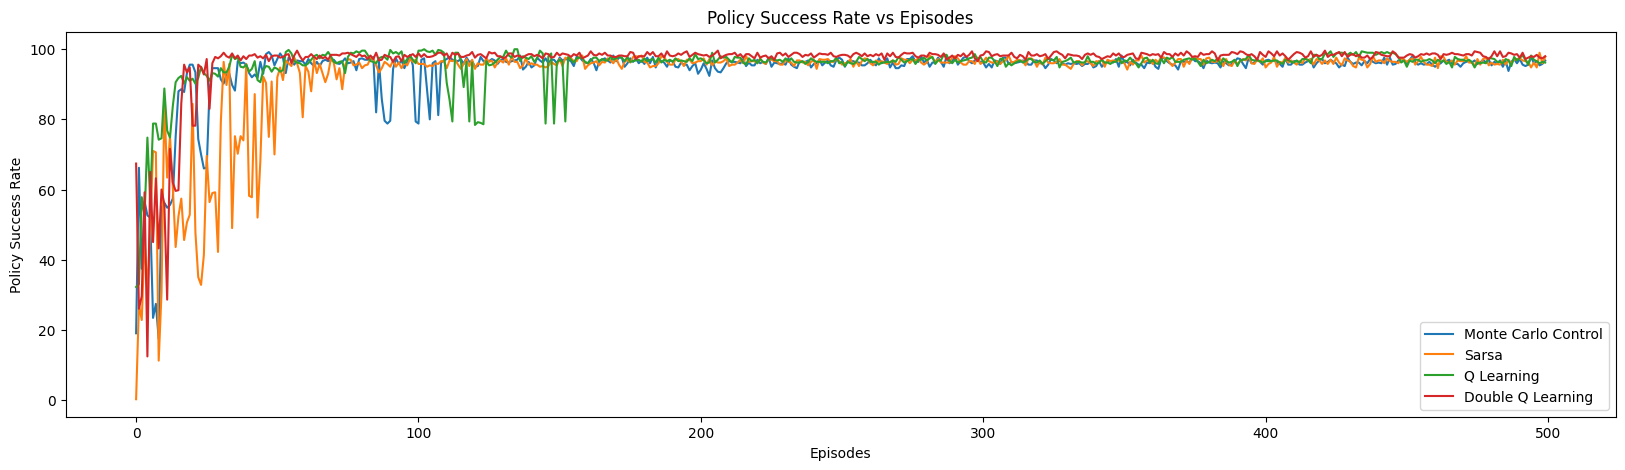

In [ ]:
plot_policy_success_rate_togetherFIRST(instances=5, maxEpisodes=100, maxSteps=200, noEpisodes=500)

In [15]:
def get_expected_return(env, current_policy, maxEpisodes = 100, maxSteps = 200, discount=0.99):
    expected_return = 0
    for e in range(maxEpisodes):
        s, terminal = env.reset()
        rewards = []
        for i in range(maxSteps):
            a = current_policy[s]
            s_, r, terminal, _ = env.step(a)
            rewards.append(r)
            if terminal:
                break
            s = s_
        expected_return += np.sum(rewards*np.power(discount, np.arange(len(rewards))))
    return expected_return/maxEpisodes

In [ ]:
def plot_expected_return_togetherFIRST(instances=5, maxEpisodes=10, maxSteps=50, noEpisodes=250, discount=0.99):

    env = RandomMaze()
    env.seed(33)
    expected_return = np.zeros((instances, noEpisodes))

    plt.rcParams["figure.figsize"] = (20,5)

    _, q_value, _ = param(instances, monte_carlo_control, average=False, gamma=0.99, alpha=0.05, epsilon=0.5, maxSteps=50, noEpisodes=noEpisodes, firstVisit=True)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            expected_return[i][e] = get_expected_return(env, policy, maxEpisodes=maxEpisodes, maxSteps=maxSteps, discount=discount)
    plt.plot(np.arange(noEpisodes), np.mean(expected_return,axis=0), label='Monte Carlo Control')

    _, q_value, _ = param(instances, sarsa, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, noEpisodes=noEpisodes)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            expected_return[i][e] = get_expected_return(env, policy, maxEpisodes=maxEpisodes, maxSteps=maxSteps, discount=discount)
    plt.plot(np.arange(noEpisodes), np.mean(expected_return,axis=0), label='Sarsa')

    _, q_value, _ = param(instances, q_learning, average=False, gamma=0.99, alpha=0.3, epsilon=0.5, noEpisodes=noEpisodes)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            expected_return[i][e] = get_expected_return(env, policy, maxEpisodes=maxEpisodes, maxSteps=maxSteps, discount=discount)
    plt.plot(np.arange(noEpisodes), np.mean(expected_return,axis=0), label='Q Learning')

    _, q_value, _ = param(instances, double_q_learning, average=False, gamma=0.99, alpha=0.3, epsilon=0.5, noEpisodes=noEpisodes)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            expected_return[i][e] = get_expected_return(env, policy, maxEpisodes=maxEpisodes, maxSteps=maxSteps, discount=discount)
    plt.plot(np.arange(noEpisodes), np.mean(expected_return,axis=0), label='Double Q Learning')

    plt.title('Expected Return vs Episodes')
    plt.xlabel('Episodes')
    plt.ylabel('Expected Return')
    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


100%|██████████| 5/5 [00:43<00:00,  8.64s/it]


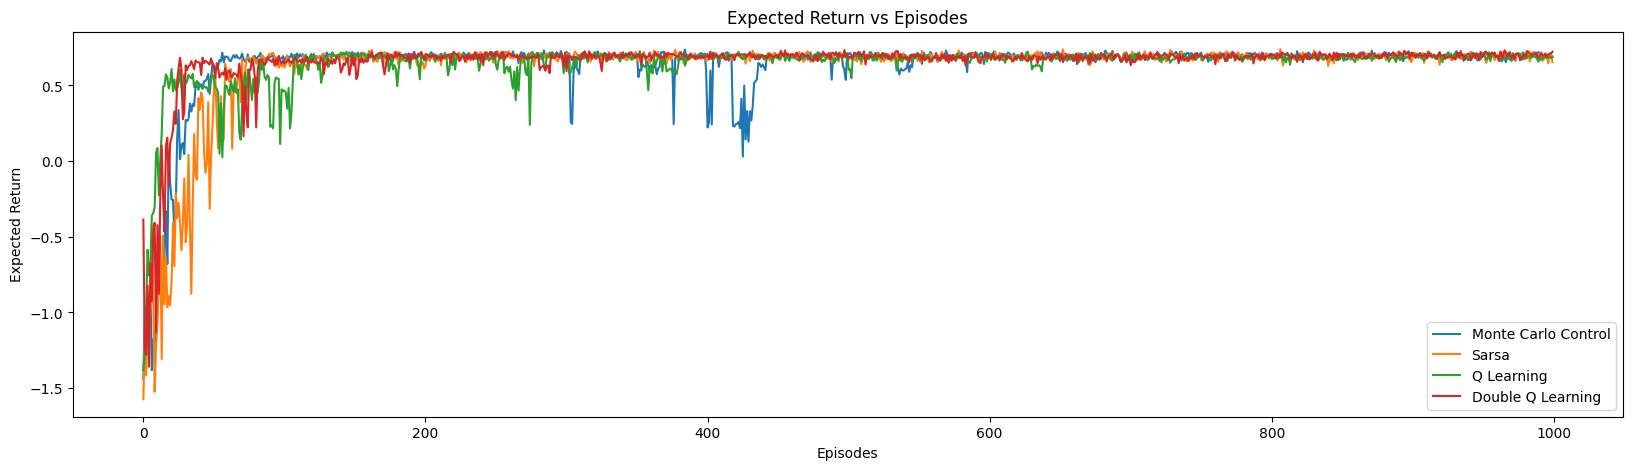

In [ ]:
plot_expected_return_togetherFIRST(instances=5, maxEpisodes=50, maxSteps=50, noEpisodes=1000, discount=0.99)

In [ ]:
def plot_estimate_error_togetherFIRST(instances=10, noEpisodes=250):
    env = RandomMaze()
    env.seed(21)

    plt.rcParams["figure.figsize"] = (20,5)
    estimate_errors = np.zeros((instances, noEpisodes))
    true_estimates = [0.82442985, 0.89286374, 0.95464233, 0.0, 0.76427486, 0., 0.68820946, 0.0, 0.69763943, 0.63906528, 0.60613368, 0.38186216]



    state_value, _, _ = param(instances, monte_carlo_control, average=False, gamma=0.99, alpha=0.05, epsilon=0.5, maxSteps=50, noEpisodes=noEpisodes, firstVisit=True)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            estimate_errors[i][e] = np.mean(np.abs(state_value[i][e] - true_estimates))
    plt.plot(np.arange(noEpisodes), np.mean(estimate_errors,axis=0), label='Monte Carlo Control')

    state_value, _, _ = param(instances, sarsa, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, noEpisodes=noEpisodes)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            estimate_errors[i][e] = np.mean(np.abs(state_value[i][e] - true_estimates))
    plt.plot(np.arange(noEpisodes), np.mean(estimate_errors,axis=0), label='Sarsa')

    state_value, _, _ = param(instances, q_learning, average=False, gamma=0.99, alpha=0.3, epsilon=0.5, noEpisodes=noEpisodes)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            estimate_errors[i][e] = np.mean(np.abs(state_value[i][e] - true_estimates))
    plt.plot(np.arange(noEpisodes), np.mean(estimate_errors,axis=0), label='Q Learning')

    state_value, _, _ = param(instances, double_q_learning, average=False, gamma=0.99, alpha=0.3, epsilon=0.5, noEpisodes=noEpisodes)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            estimate_errors[i][e] = np.mean(np.abs(state_value[i][e] - true_estimates))
    plt.plot(np.arange(noEpisodes), np.mean(estimate_errors,axis=0), label='Double Q Learning')

    plt.title('Estimated Mean State Value Error vs Episodes')
    plt.xlabel('Episodes')
    plt.ylabel('Mean State Value Error')
    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


100%|██████████| 10/10 [00:00<00:00, 80.47it/s]


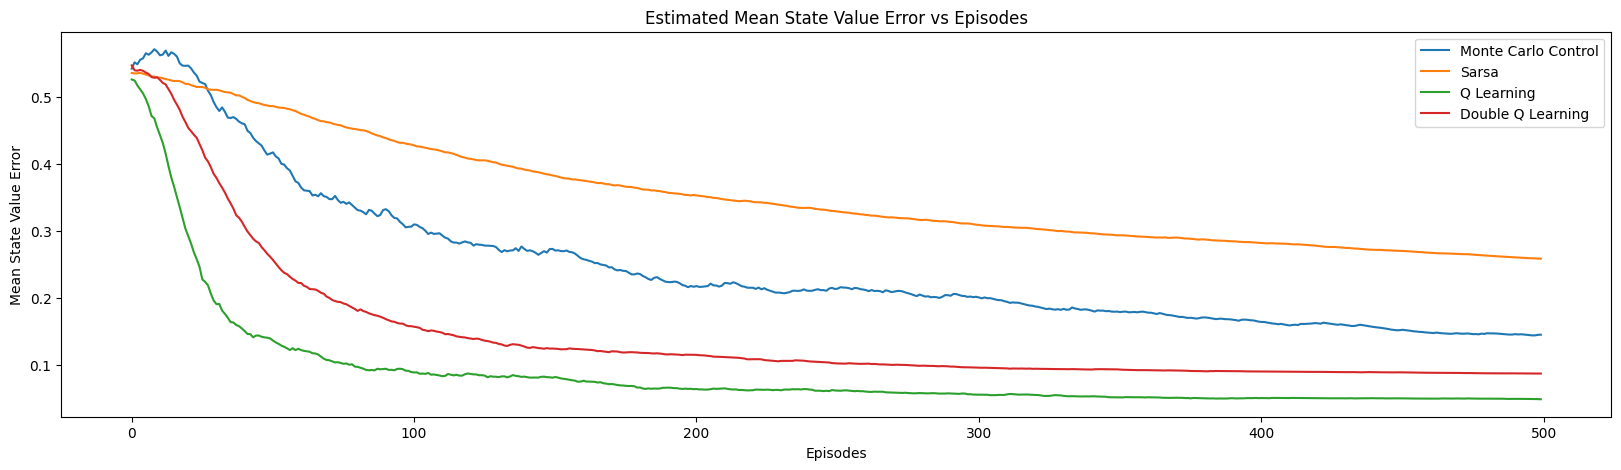

In [ ]:
plot_estimate_error_togetherFIRST(instances=10, noEpisodes=500)

Problem 6

In [17]:
def sarsa_lambda(env, gamma, alpha, epsilon, lda, noEpisodes, replaceTrace = True):
    Q = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q_est = np.zeros((noEpisodes, len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))

    for e in range(noEpisodes):
       #Calling decay learning rate and decay epsilon functions
        alpha_e = decayLearningRate(alpha, e, noEpisodes)
        epsilon_e = decayEpsilon(epsilon, e, noEpisodes)
        E = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
        s, terminal = env.reset()
        #calling action selection function
        a = actionSelect(s, Q, epsilon_e)

        while not terminal:
            s_, r, terminal, _ = env.step(a)
            a_ = actionSelect(s_, Q, epsilon_e)
            td_target = r
            if not terminal:
                td_target += gamma * Q[s_][a_]
            td_error = td_target - Q[s][a]
            E[s][a] += 1
            if replaceTrace:
                E = np.clip(E, 0, 1)
            Q += alpha_e*td_error*E
            E *= gamma*lda
            s = s_
            a = a_
        Q_est[e] = Q

    state_value = np.max(Q_est, axis=2)
    q_value = Q_est
    optimal_policy = GreedyPolicy(q_value[-1])

    return state_value, q_value, optimal_policy

In [ ]:

state_value, q_value, optimal_policy = param(10, sarsa_lambda, average=True, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=500, replaceTrace=True)

print("the state values are :")
print(state_value)
print("the q_values are :")
print(q_value)
print("the optimal policy is : ")
print(optimal_policy)


100%|██████████| 10/10 [00:02<00:00,  4.81it/s]

the state values are :
[[-3.43522995e-03  2.58608877e-03  2.99035890e-02 ... -1.23023980e-03
  -1.79668559e-04  0.00000000e+00]
 [-5.81145618e-03  6.32022450e-03  5.28032225e-02 ... -5.73742974e-03
  -1.66329788e-03 -1.13716167e-03]
 [-6.31424230e-03  1.90071171e-02  9.02845771e-02 ... -1.09495952e-02
  -2.02574905e-03 -1.13716167e-03]
 ...
 [ 6.89553243e-01  8.10629813e-01  9.24710501e-01 ...  1.63089687e-01
   1.02654848e-01 -4.37699878e-02]
 [ 6.90355757e-01  8.11434279e-01  9.25318786e-01 ...  1.63611667e-01
   1.02972450e-01 -4.37699878e-02]
 [ 6.90567422e-01  8.11802794e-01  9.24892269e-01 ...  1.63899584e-01
   1.02972450e-01 -4.37699878e-02]]
the q_values are :
[[[-6.48387077e-03 -6.70283720e-03 -5.10241068e-03 -4.77091978e-03]
  [-4.17871955e-03 -4.15517597e-03  2.47904314e-04 -2.81241193e-03]
  [-8.25249648e-03  6.36903063e-03  2.49196575e-02 -9.35281825e-04]
  ...
  [-3.33976233e-03 -3.55760916e-03 -6.04293577e-03 -1.92123255e-03]
  [-3.98452342e-03 -2.73913011e-03 -3.061076

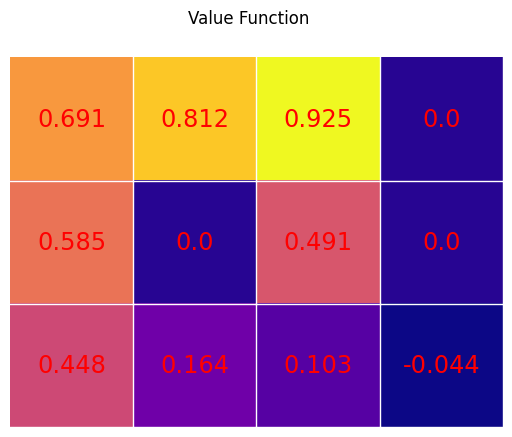

In [ ]:
#Plotting the state value
plotValueFunction(state_value)

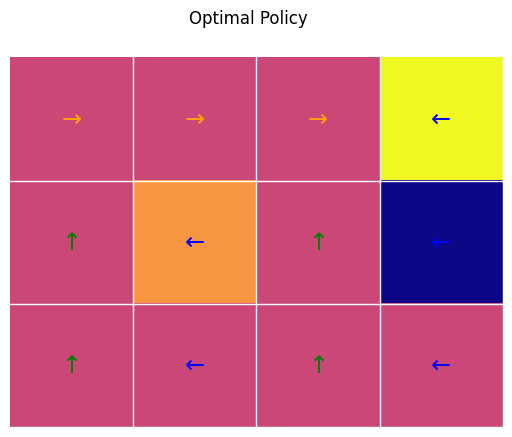

In [21]:
#Plotting the state value
plotPolicy(optimal_policy)

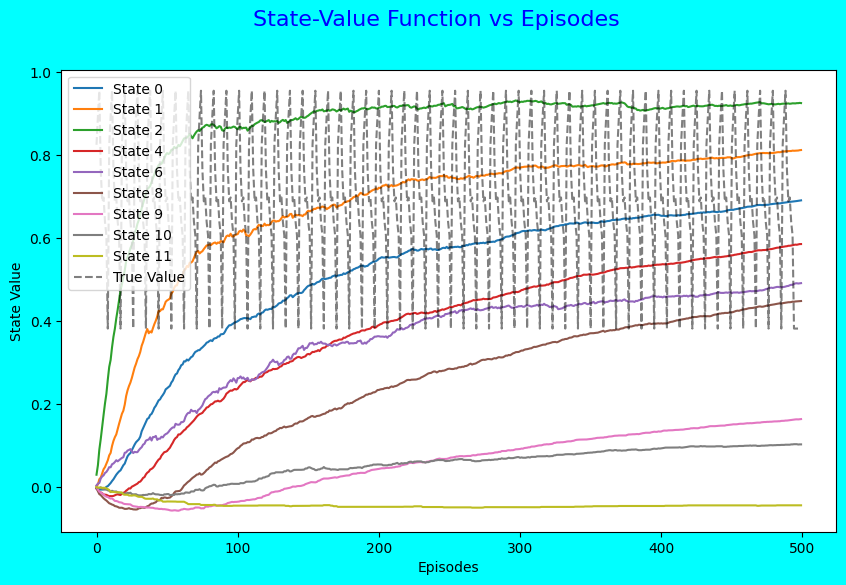

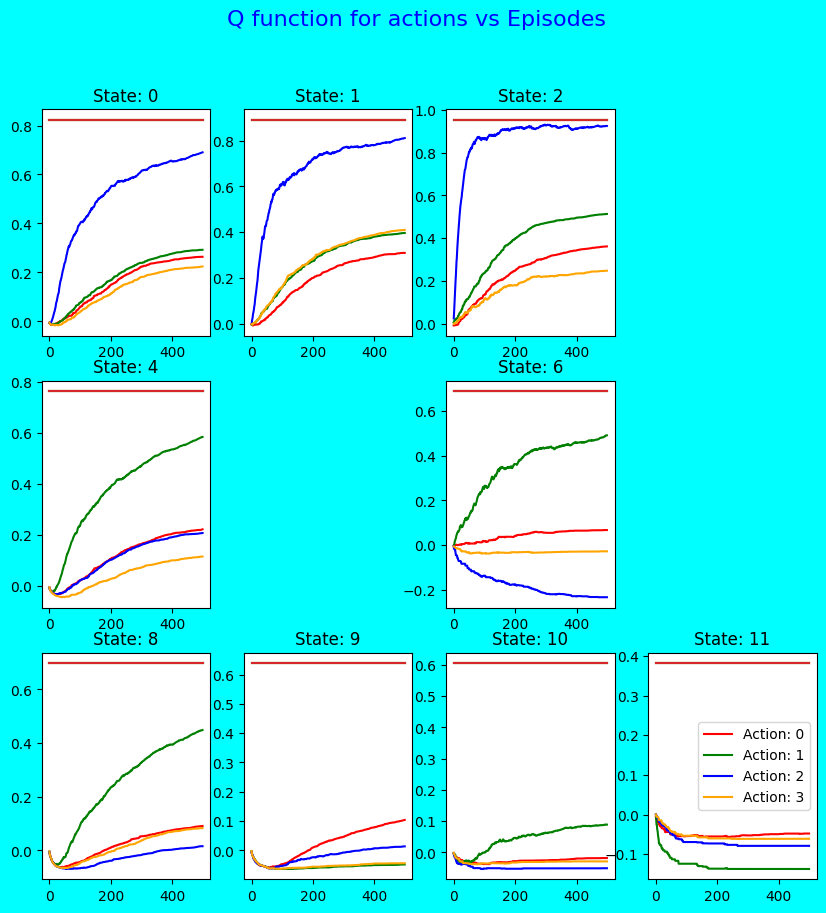

In [ ]:
#plotting the V and Q function
plot(state_value, q_value)

Problem 7


In [18]:

state_value, q_value, optimal_policy = param(10, sarsa_lambda, average=True, gamma=0.99, alpha=0.05, epsilon=0.5, lda=0.5, noEpisodes=500, replaceTrace=False)
print("the state values are :")
print(state_value)
print("the q_values are :")
print(q_value)
print("the optimal policy is : ")
print(optimal_policy)


100%|██████████| 10/10 [00:01<00:00,  5.20it/s]

the state values are :
[[-3.52202155e-03  5.11275206e-03  3.18110103e-02 ... -4.70922310e-04
  -1.69886438e-04  0.00000000e+00]
 [-5.18099211e-03  9.16494946e-03  6.76329352e-02 ... -2.89520130e-03
  -4.78796821e-04  0.00000000e+00]
 [-7.86116677e-03  1.81741966e-02  9.51369735e-02 ... -5.78225297e-03
  -5.82417453e-04 -4.65768375e-04]
 ...
 [ 6.77573243e-01  8.02486621e-01  9.28175644e-01 ...  1.28177038e-01
   8.07907800e-02 -8.31550009e-02]
 [ 6.77932826e-01  8.02842345e-01  9.27428536e-01 ...  1.28824672e-01
   8.07907800e-02 -8.31550009e-02]
 [ 6.78560081e-01  8.03802554e-01  9.28091577e-01 ...  1.28993422e-01
   8.00833857e-02 -8.31550009e-02]]
the q_values are :
[[[-6.94488020e-03 -6.18275323e-03 -4.69073854e-03 -5.87536989e-03]
  [-3.61880162e-03 -2.51655579e-03  1.41938204e-03 -8.58618007e-05]
  [ 2.86873027e-03  2.06421749e-04  2.72022004e-02  4.43962203e-03]
  ...
  [-4.39284615e-03 -3.51991111e-03 -4.95779931e-03 -1.43547907e-03]
  [-4.04117153e-03 -7.83811960e-03 -3.614648

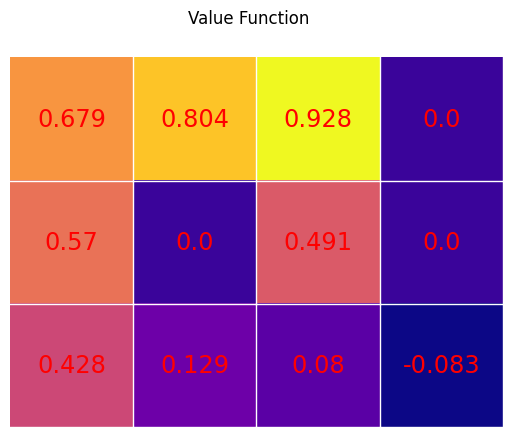

In [15]:
#Plotting the state value
plotValueFunction(state_value)

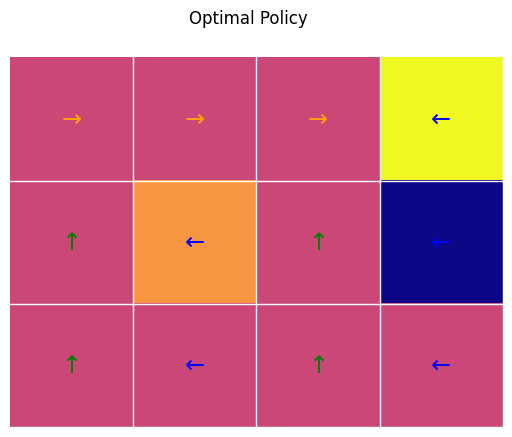

In [22]:
#Plotting the state value
plotPolicy(optimal_policy)

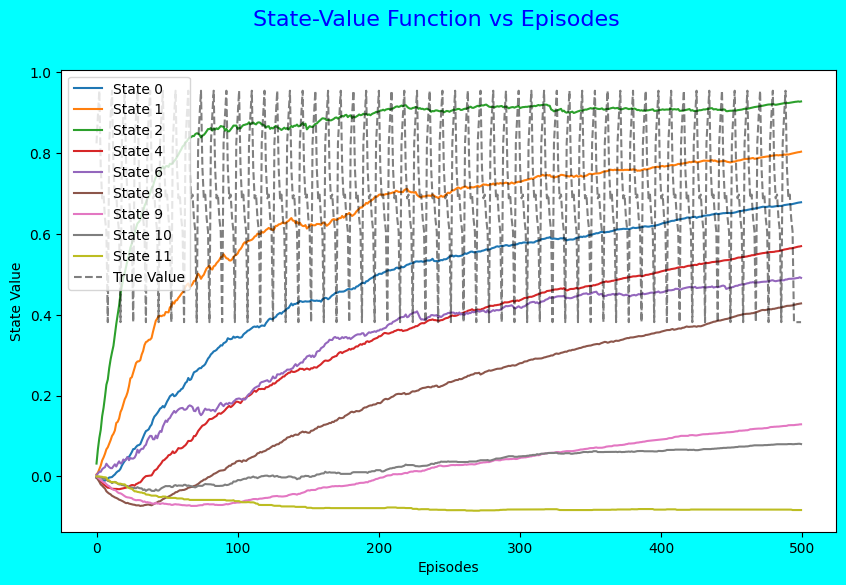

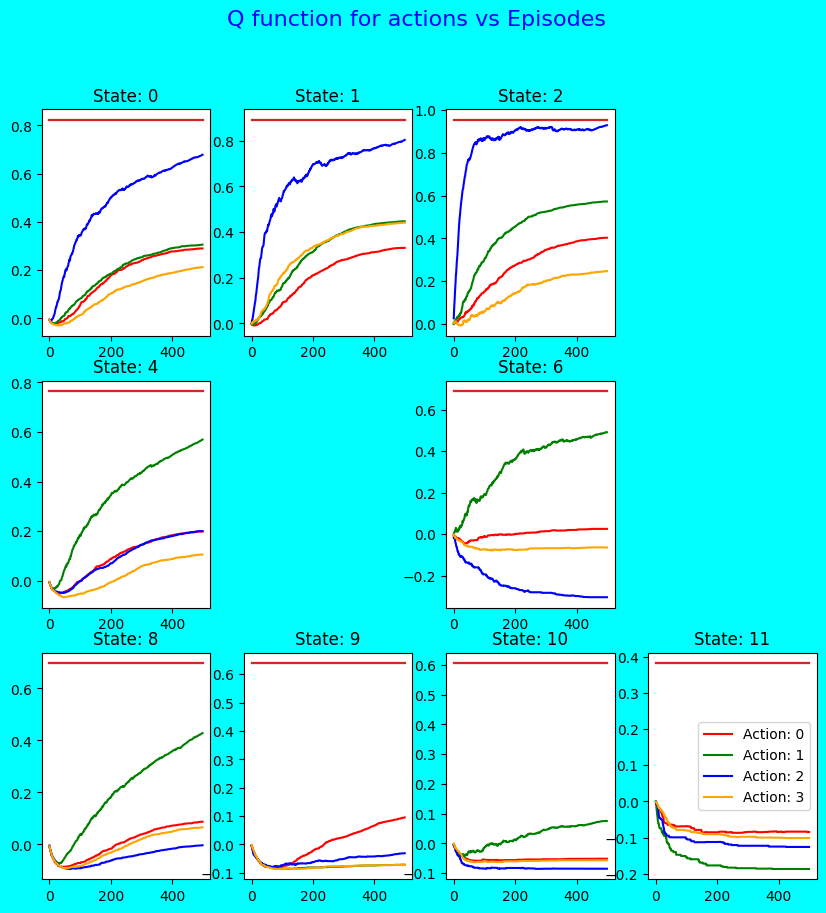

In [17]:
#plotting the V and Q function
plot(state_value, q_value)

Problem 8

In [19]:
def q_lambda(env, gamma, alpha, epsilon, lda, noEpisodes, replaceTrace = True):
    Q = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q_est = np.zeros((noEpisodes, len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))

    for e in range(noEpisodes):
       #calling the decay learning rate and decay epsilon functions
        alpha_e = decayLearningRate(alpha, e, noEpisodes)
        epsilon_e = decayEpsilon(epsilon, e, noEpisodes)
        E = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
        s, terminal = env.reset()
        #calling action selection method
        a = actionSelect(s, Q, epsilon_e)

        while not terminal:
            s_, r, terminal, _ = env.step(a)
            a_ = actionSelect(s_, Q, epsilon_e)
            if Q[s_][a_] == np.max(Q[s_]):
                s_greedy = True
            else:
                s_greedy = False
            td_target = r
            if not terminal:
                td_target += gamma * np.max(Q[s_])
            td_error = td_target - Q[s][a]

            if replaceTrace:
                E[s] = np.zeros(len(env.transition_matrix[0]))
            E[s][a] += 1
            Q += alpha_e*td_error*E
            if s_greedy:
                E *= gamma*lda
            else:
                E = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
            s = s_
            a = a_
        Q_est[e] = Q

    state_value = np.max(Q_est, axis=2)
    q_value = Q_est
    optimal_policy = GreedyPolicy(q_value[-1])
    return state_value, q_value, optimal_policy

In [25]:

state_value, q_value, optimal_policy = param(10, q_lambda, average=True, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=500, replaceTrace=True)


print("the state values are :")
print(state_value)
print("the q_values are :")
print(q_value)
print("the optimal policy is : ")
print(optimal_policy)

100%|██████████| 10/10 [00:04<00:00,  2.23it/s]

the state values are :
[[-3.21191962e-03  5.99689210e-03  2.95148103e-02 ... -9.82842828e-04
  -4.97396363e-04  0.00000000e+00]
 [-5.12514407e-03  8.09575799e-03  5.71911610e-02 ... -3.45748775e-03
  -1.38681074e-03 -7.81990879e-04]
 [-4.93645260e-03  1.47299072e-02  8.04502803e-02 ... -7.99660370e-03
  -4.20630684e-03 -1.17878543e-03]
 ...
 [ 8.16226209e-01  8.85416739e-01  9.49176636e-01 ...  4.26383833e-01
   2.40497465e-01 -9.60074657e-03]
 [ 8.16509303e-01  8.85665989e-01  9.49632351e-01 ...  4.26115151e-01
   2.39626000e-01 -9.60074657e-03]
 [ 8.16133888e-01  8.85312178e-01  9.49333687e-01 ...  4.26203619e-01
   2.40239735e-01 -9.60074657e-03]]
the q_values are :
[[[-5.33854221e-03 -5.25282350e-03 -5.36452793e-03 -4.59388006e-03]
  [-3.91571796e-03 -3.64774442e-03  3.67612244e-03 -3.47084583e-03]
  [-5.42489005e-03  8.40366054e-03  1.97363687e-02 -3.43461051e-03]
  ...
  [-3.01375696e-03 -2.23219066e-03 -3.35853759e-03 -1.28818689e-03]
  [-2.21777298e-03 -1.23649415e-03 -5.522228

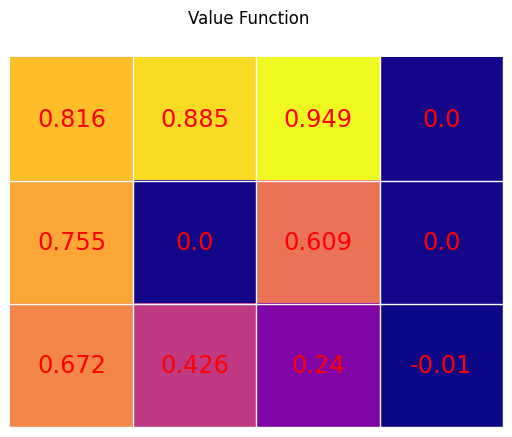

In [26]:
#Plotting the state value
plotValueFunction(state_value)

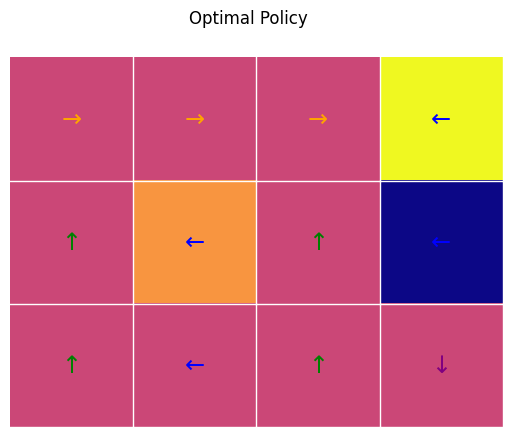

In [27]:
#plotting the optimal policy
plotPolicy(optimal_policy)

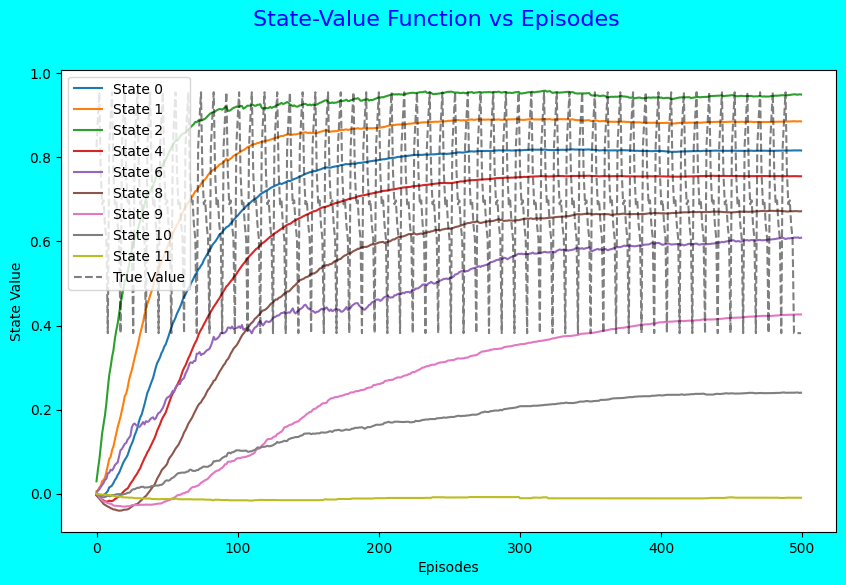

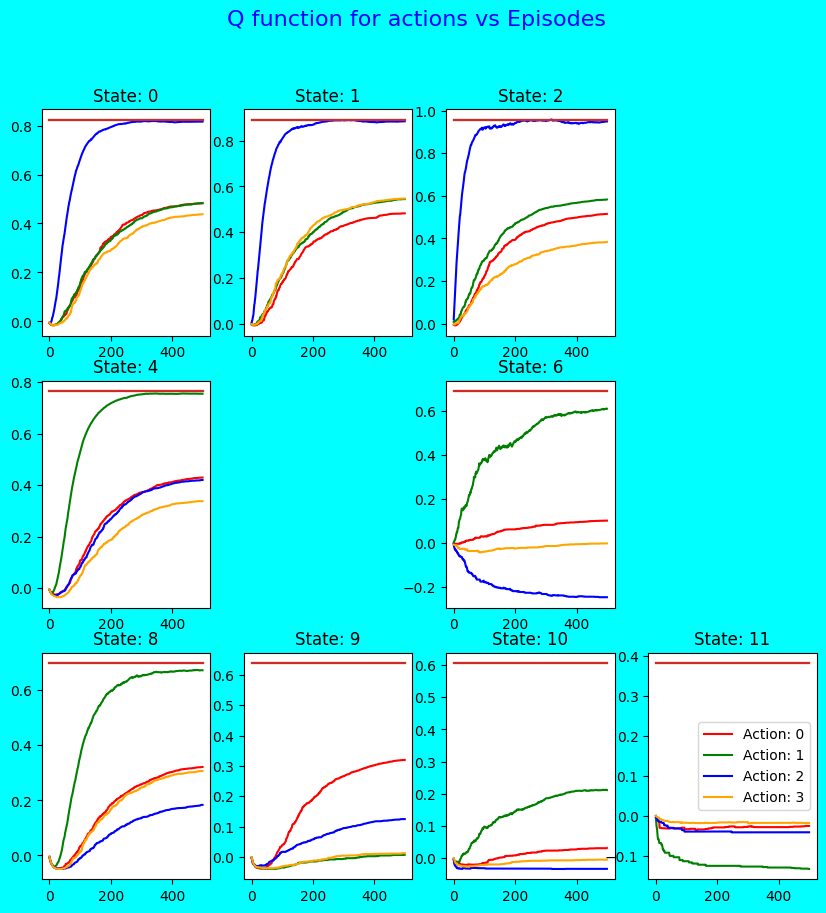

In [28]:
#plotting the V and Q function
plot(state_value, q_value)

Problem 9

In [20]:

state_value, q_value, optimal_policy = param(10, q_lambda, average=True, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=500, replaceTrace=False)

print("the state values are :")
print(state_value)
print("the q_values are :")
print(q_value)
print("the optimal policy is : ")
print(optimal_policy)



100%|██████████| 10/10 [00:02<00:00,  3.91it/s]

the state values are :
[[-3.56336457e-03  3.60050649e-03  2.99035890e-02 ... -9.92208644e-04
  -5.93362252e-04  0.00000000e+00]
 [-5.29509351e-03  9.87440980e-03  6.63467477e-02 ... -5.59919002e-03
  -7.21138227e-04  0.00000000e+00]
 [-5.41754328e-03  2.20522736e-02  9.82177454e-02 ... -1.01110133e-02
  -3.10725556e-03 -1.68360677e-03]
 ...
 [ 8.06004528e-01  8.85487160e-01  9.49825784e-01 ...  4.55814413e-01
   2.39809552e-01 -1.06043669e-03]
 [ 8.05892573e-01  8.85554939e-01  9.49798971e-01 ...  4.55685238e-01
   2.39225222e-01 -1.41168865e-03]
 [ 8.05802672e-01  8.85663536e-01  9.50283120e-01 ...  4.56046403e-01
   2.39747333e-01 -1.41168865e-03]]
the q_values are :
[[[-6.27145496e-03 -5.82712590e-03 -5.21943072e-03 -4.57350769e-03]
  [-4.16210113e-03 -2.97270577e-03  2.87191362e-03 -1.71083494e-03]
  [-6.52532844e-05  8.66682628e-03  2.49196575e-02 -1.45293833e-03]
  ...
  [-3.58710423e-03 -2.89658421e-03 -6.21302517e-03 -2.96731339e-03]
  [-2.40864211e-03 -4.75527913e-03 -7.139845

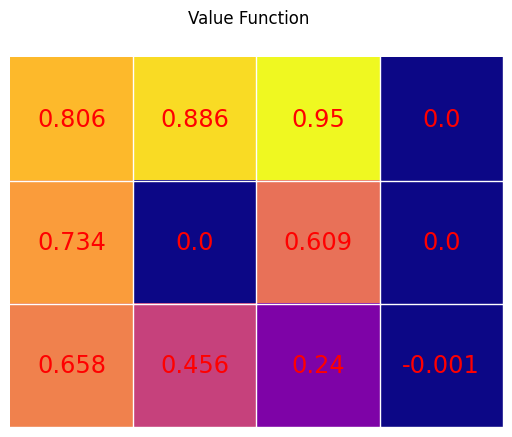

In [ ]:
#Plotting the state value
plotValueFunction(state_value)

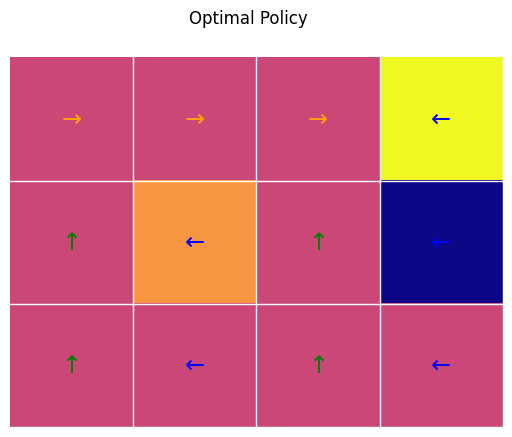

In [ ]:
#plotting the optimal policy
plotPolicy(optimal_policy)

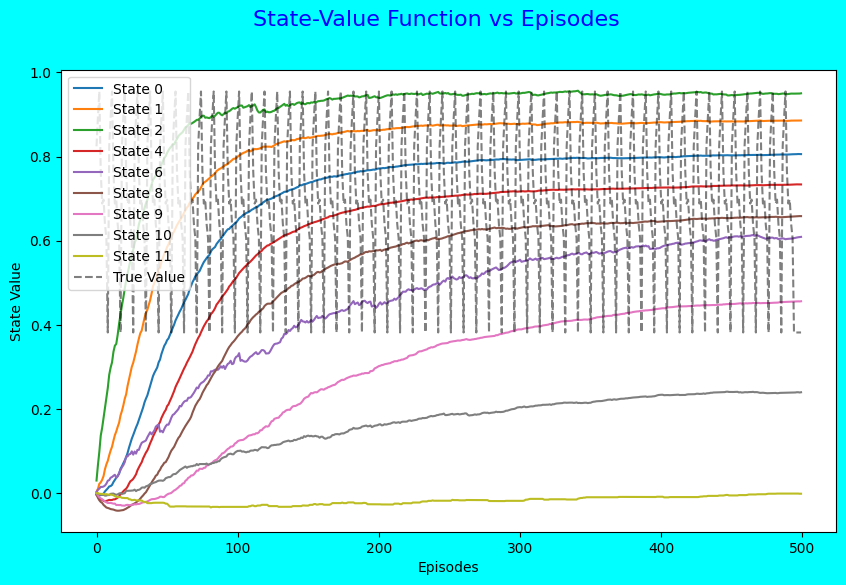

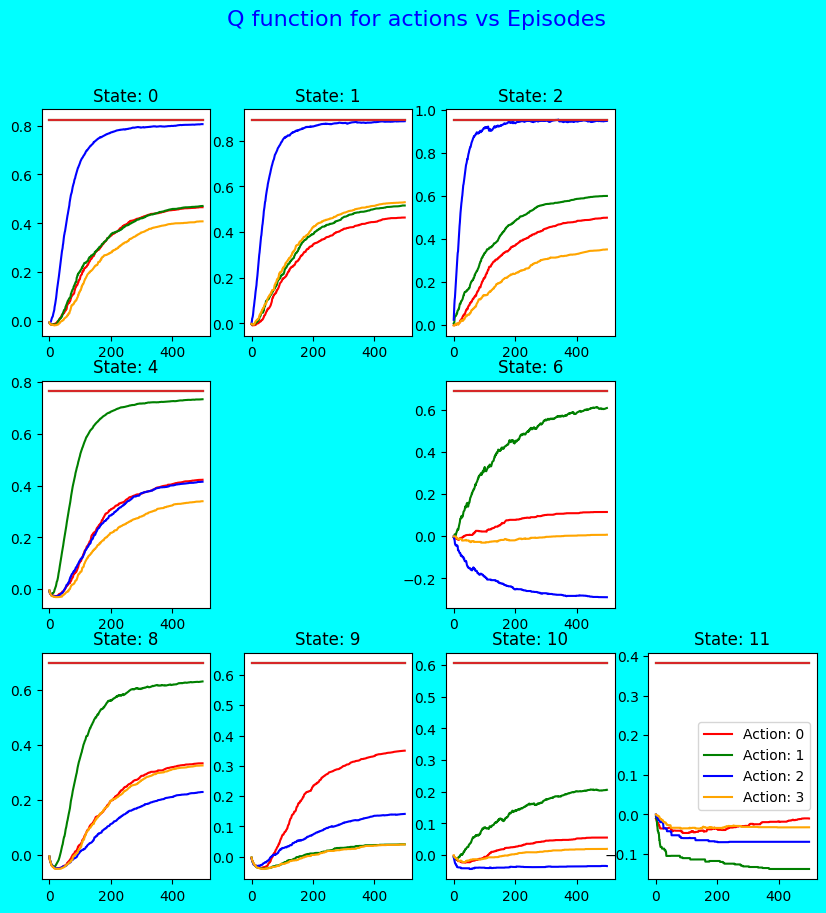

In [ ]:
#plotting the V and Q function
plot(state_value, q_value)

Problem 10

In [21]:
def getVisitedStateAction(T):
    path = {}
    for state in range(T.shape[0]):
        for action in range(T.shape[1]):
            for next_state in range(T.shape[2]):
                if T[state][action][next_state] > 0:
                    try:
                        path[state].append(action)
                    except:
                        path[state] = [action]
    s = np.random.choice(list(path.keys()))
    a = np.random.choice(path[s])
    return s, a

In [22]:
def dyna_q(env, gamma, alpha, epsilon, noEpisodes, noPlanning):
    Q = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q_est = np.zeros((noEpisodes, len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    T = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0]), len(env.transition_matrix.keys())+1))
    R = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0]), len(env.transition_matrix.keys())+1))

    for e in range(noEpisodes):
        #calling decay learning rate and decay epsilon function
        alpha_e = decayLearningRate(alpha, e, noEpisodes)
        epsilon_e = decayEpsilon(epsilon, e, noEpisodes)
        s, terminal = env.reset()

        store = {}
        while not terminal:
            #calling action selection function
            a = actionSelect(s, Q, epsilon_e)
            s_, r, terminal, _ = env.step(a)
            T[s][a][s_] += 1
            try:
                store[s].append(a)
            except:
                store[s] = [a]
            rDiff = r - R[s][a][s_]
            R[s][a][s_] += rDiff/T[s][a][s_]
            td_target = r
            if not terminal:
                td_target += gamma * np.max(Q[s_])
            td_error = td_target - Q[s][a]
            Q[s][a] += alpha_e*td_error
            s_back_up = s_

            for _ in range(noPlanning):
                if np.sum(Q) == 0:
                    break
                # s, a = getVisitedStateAction(T)
                s = np.random.choice(list(store.keys()))
                a = np.random.choice(store[s])
                l = np.sum(T[s][a])
                prob_s_ = T[s][a]/l
                s_ = np.random.choice(len(env.transition_matrix.keys())+1, size=1, p=prob_s_)
                r = R[s][a][s_]
                td_target = r + gamma * np.max(Q[s_])
                td_error = td_target - Q[s][a]
                Q[s][a] += alpha_e*td_error
            s = s_back_up
        Q_est[e] = Q

    state_value = np.max(Q_est, axis=2)
    q_value = Q_est
    optimal_policy = GreedyPolicy(q_value[-1])

    return state_value, q_value, optimal_policy

In [32]:

state_value, q_value, optimal_policy = param(10, dyna_q, gamma=0.99, alpha=0.05, epsilon=0.3, noEpisodes=500, noPlanning=100)


print("the state values are :")
print(state_value)
print("the q_values are :")
print(q_value)
print("the optimal policy is : ")
print(optimal_policy)

  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-31-9ec61520e2db>:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Q[s][a] += alpha_e*td_error
100%|██████████| 10/10 [08:16<00:00, 49.65s/it]

the state values are :
[[-2.29448960e-02  5.13180416e-04  1.27035797e-01 ... -2.07697082e-02
  -5.48976503e-03  0.00000000e+00]
 [ 8.45070486e-03  1.41129590e-01  2.95326460e-01 ... -5.90390199e-02
  -2.35427347e-02  0.00000000e+00]
 [ 8.74325103e-02  1.89923303e-01  4.93567212e-01 ... -6.14268604e-02
   5.26942454e-02 -1.79551219e-02]
 ...
 [ 8.21109248e-01  8.89628302e-01  9.49793768e-01 ...  6.41291536e-01
   6.09514892e-01  3.63323508e-01]
 [ 8.20014143e-01  8.89060189e-01  9.49919857e-01 ...  6.37889117e-01
   6.09514892e-01  3.63323508e-01]
 [ 8.19836910e-01  8.88742276e-01  9.49194822e-01 ...  6.37841760e-01
   6.09514892e-01  3.63323508e-01]]
the q_values are :
[[[-0.04641539 -0.03992284 -0.03250317 -0.05011764]
  [-0.04019873 -0.030201   -0.00257863 -0.01792581]
  [-0.03728369 -0.01105017  0.1270358  -0.01191253]
  ...
  [-0.0503594  -0.03430546 -0.02790679 -0.03262322]
  [-0.04595893 -0.02451864 -0.00548977 -0.00938417]
  [-0.01086108 -0.06943025  0.          0.        ]]

 [

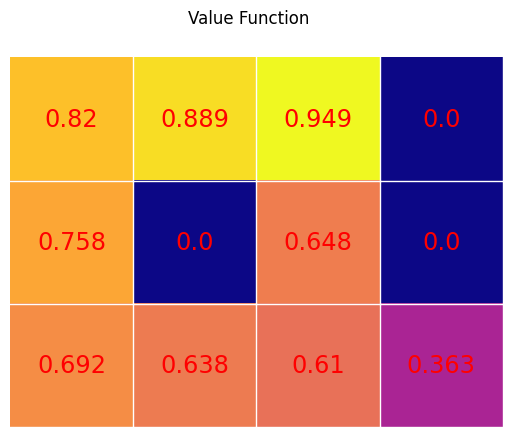

In [ ]:
#Plotting the state value
plotValueFunction(state_value)

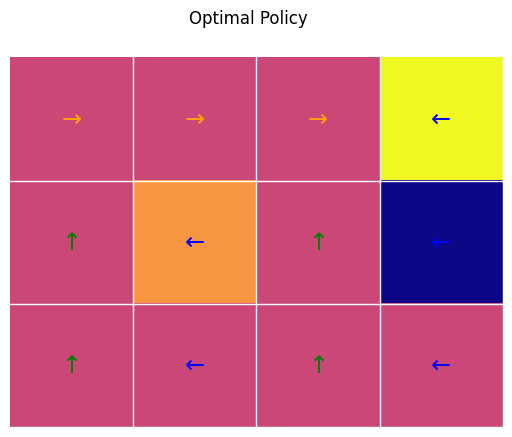

In [ ]:
#plotting the optimal policy
plotPolicy(optimal_policy)

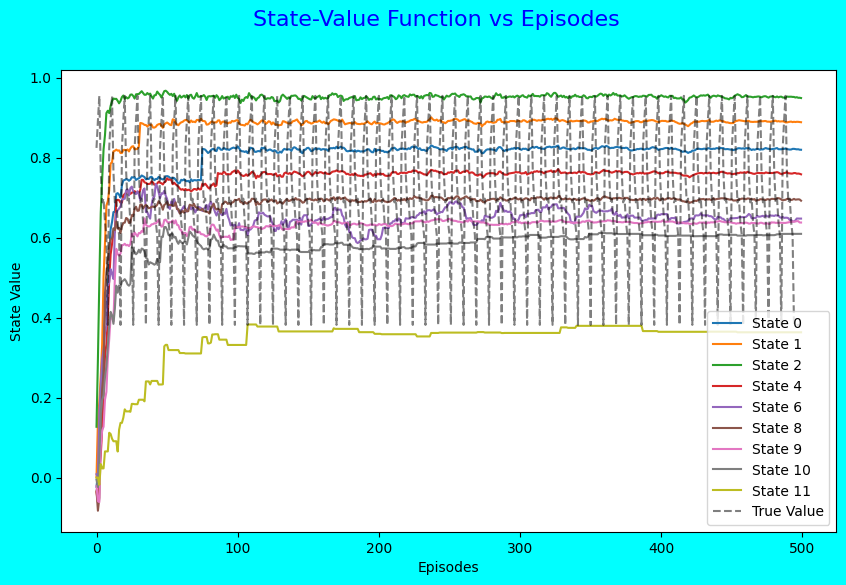

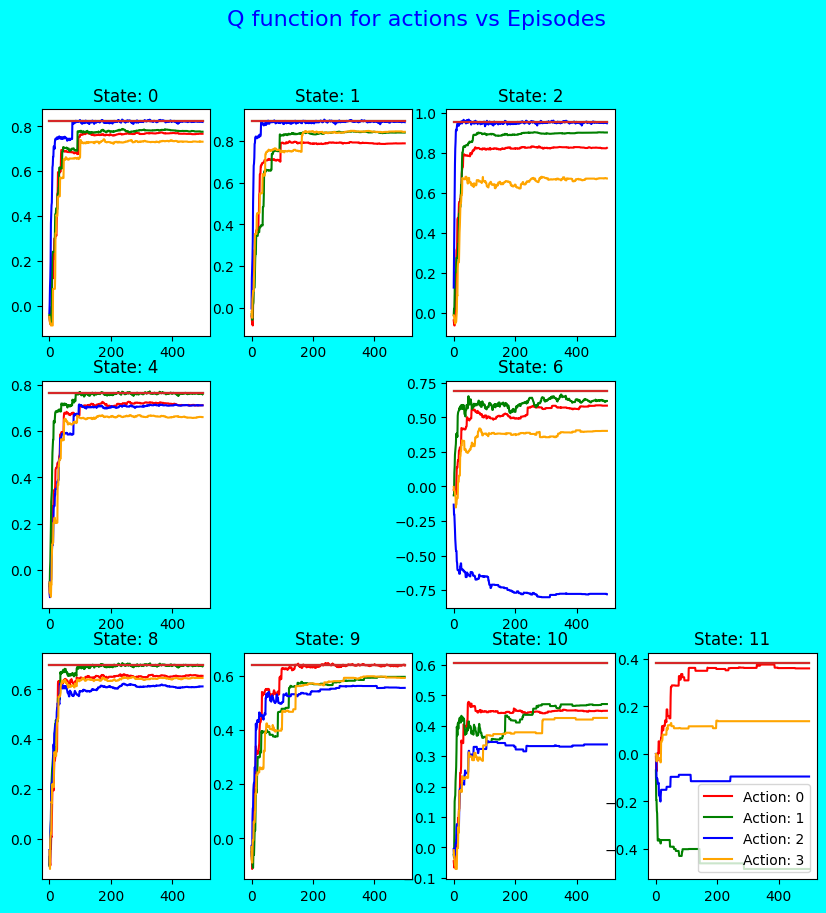

In [ ]:
#plotting the V and Q function
plot(state_value, q_value)

Problem 11

In [23]:
def trajectory_sampling(env, gamma, alpha, epsilon, noEpisodes, maxTrajectory):
    Q = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q_est = np.zeros((noEpisodes, len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    T = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0]), len(env.transition_matrix.keys())+1))
    R = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0]), len(env.transition_matrix.keys())+1))

    for e in range(noEpisodes):
      #calling decay learning rate and decay epsilon function
        alpha_e = decayLearningRate(alpha, e, noEpisodes)
        epsilon_e = decayEpsilon(epsilon, e, noEpisodes)
        s, terminal = env.reset()

        while not terminal:
          #calling the action selection function
            a = actionSelect(s, Q, epsilon_e)
            s_, r, terminal, _ = env.step(a)
            T[s, a, s_] += 1
            rDiff = r - R[s, a, s_]
            R[s][a][s_] += rDiff/T[s][a][s_]
            td_target = r
            if not terminal:
                td_target += gamma * np.max(Q[s_])
            td_error = td_target - Q[s][a]
            Q[s][a] += alpha_e*td_error
            s_back_up = s_

            for _ in range(maxTrajectory):
                if np.sum(Q) == 0:
                    break
                a = np.random.choice(np.flatnonzero(np.isclose(Q[s], np.max(Q[s]))))
                if np.sum(T[s,a]) == 0:
                    break
                prob_s_ = np.squeeze(T[s,a]/np.sum(T[s,a]))
                s_ = np.random.choice(len(env.transition_matrix.keys())+1, size=1, p=prob_s_)
                r = R[s, a, s_]
                td_target = r + gamma * np.max(Q[s_])
                td_error = td_target - Q[s, a]
                Q[s, a] += alpha_e*td_error
                s = s_
            s = s_back_up
        Q_est[e] = Q

    state_value = np.max(Q_est, axis=2)
    q_value = Q_est
    optimal_policy = GreedyPolicy(q_value[-1])

    return state_value, q_value, optimal_policy

In [ ]:

state_value, q_value, optimal_policy = param(10, trajectory_sampling, gamma=0.99, alpha=0.08, epsilon=0.4, noEpisodes=500, maxTrajectory=100)

print("the state values are :")
print(state_value)
print("the q_values are :")
print(q_value)
print("the optimal policy is : ")
print(optimal_policy)

  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-43-b442e49c55ae>:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Q[s, a] += alpha_e*td_error
100%|██████████| 10/10 [01:31<00:00,  9.17s/it]

the state values are :
[[-0.02823481 -0.0123337   0.09006888 ... -0.01281555 -0.00662998
   0.        ]
 [-0.02357913  0.04501743  0.31056136 ... -0.02706108 -0.00914432
   0.        ]
 [-0.00728383  0.10167678  0.50261159 ... -0.04494678 -0.01882818
  -0.01925352]
 ...
 [ 0.79240029  0.89623974  0.95505244 ...  0.58024412  0.53084888
   0.18988033]
 [ 0.79223914  0.89614661  0.95468605 ...  0.58039303  0.53036606
   0.19053324]
 [ 0.79242605  0.89584008  0.95390945 ...  0.58039596  0.53124734
   0.19053324]]
the q_values are :
[[[-3.23464444e-02 -3.15074688e-02 -2.93827607e-02 -3.65327241e-02]
  [-1.43624865e-02 -1.37631591e-02 -1.31108888e-02 -1.32236119e-02]
  [-3.24553876e-03 -3.86520441e-03  8.97502056e-02 -2.06091710e-03]
  ...
  [-1.94277292e-02 -1.39449653e-02 -1.47811826e-02 -1.32442388e-02]
  [-8.57241055e-03 -8.30286082e-03 -7.24193424e-03 -7.68920489e-03]
  [-6.37343842e-04 -8.46952563e-03 -3.18671921e-04  0.00000000e+00]]

 [[-4.37398985e-02 -4.29895248e-02 -2.42098305e-02

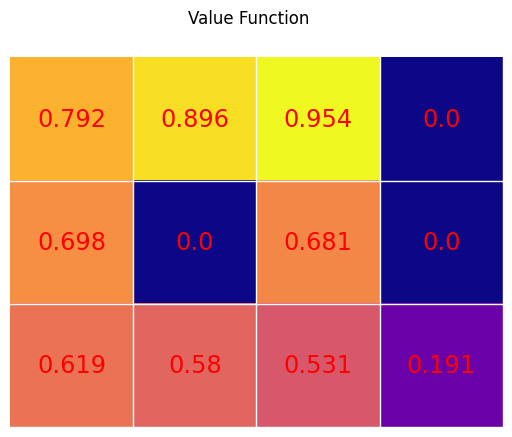

In [ ]:
#Plotting the state value
plotValueFunction(state_value)

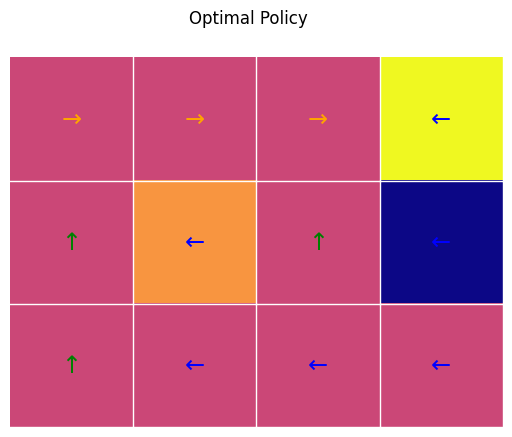

In [ ]:
#plotting the optimal policy
plotPolicy(optimal_policy)

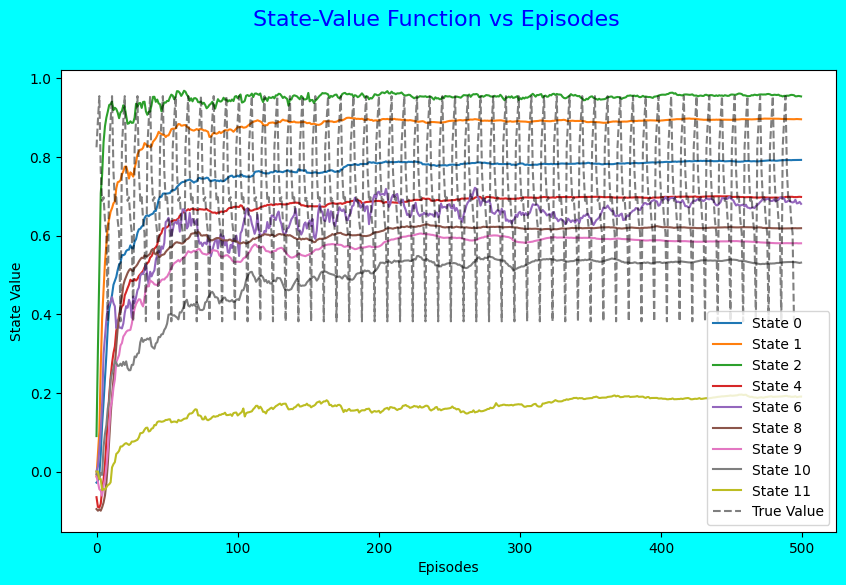

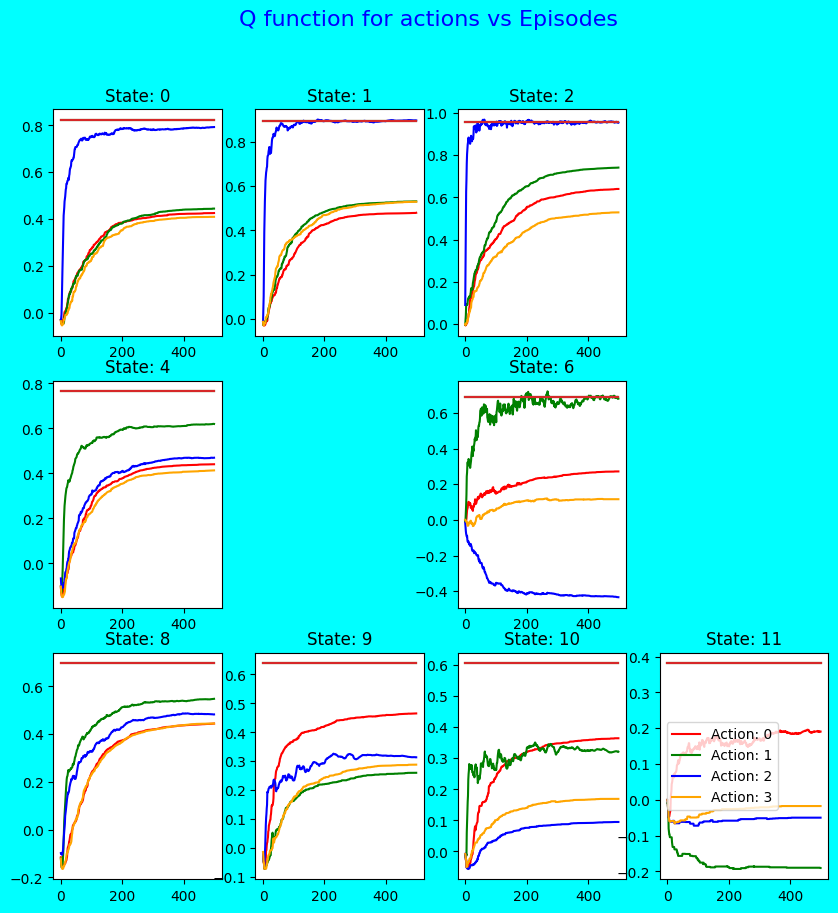

In [ ]:
#plotting the V and Q function
plot(state_value, q_value)

Problem 12

In [3]:

def plot_policy_success_rate_together(instances=10, maxEpisodes=50, maxSteps=50, noEpisodes=250):

    env = RandomMaze()
    env.seed(36)
    policy_success_rates = np.zeros((instances, noEpisodes))

    plt.rcParams["figure.figsize"] = (10,5)

    _, q_value, _ = param(instances, sarsa_lambda, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=True)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            policy_success_rates[i][e] = get_policy_success_rate(env, policy, env.goal, maxEpisodes, maxSteps)
    plt.plot(np.arange(noEpisodes), np.mean(policy_success_rates,axis=0), label='SARSA(λ) Replacing', linestyle='-', marker='o')

    _, q_value, _ = param(instances, sarsa_lambda, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=False)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            policy_success_rates[i][e] = get_policy_success_rate(env, policy, env.goal, maxEpisodes, maxSteps)
    plt.plot(np.arange(noEpisodes), np.mean(policy_success_rates,axis=0), label='SARSA(λ) Accumulating', linestyle='--', marker='s')

    _, q_value, _ = param(instances, q_lambda, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=True)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            policy_success_rates[i][e] = get_policy_success_rate(env, policy, env.goal, maxEpisodes, maxSteps)
    plt.plot(np.arange(noEpisodes), np.mean(policy_success_rates,axis=0), label='Q(λ) Replacing', linestyle='-.', marker='^')

    _, q_value, _ = param(instances, q_lambda, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=False)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            policy_success_rates[i][e] = get_policy_success_rate(env, policy, env.goal, maxEpisodes, maxSteps)
    plt.plot(np.arange(noEpisodes), np.mean(policy_success_rates,axis=0), label='Q(λ) Accumulating', linestyle=':', marker='x')

    _, q_value, _ = param(instances, dyna_q, average=False, gamma=0.9, alpha=0.05, epsilon=0.3, noEpisodes=noEpisodes, noPlanning=50)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            policy_success_rates[i][e] = get_policy_success_rate(env, policy, env.goal, maxEpisodes, maxSteps)
    plt.plot(np.arange(noEpisodes), np.mean(policy_success_rates,axis=0), label='Dyna Q', linestyle='-', marker='d')

    _, q_value, _ = param(instances, trajectory_sampling, average=False, gamma=0.99, alpha=0.05, epsilon=0.6, noEpisodes=noEpisodes, maxTrajectory=50)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            policy_success_rates[i][e] = get_policy_success_rate(env, policy, env.goal, maxEpisodes, maxSteps)
    plt.plot(np.arange(noEpisodes), np.mean(policy_success_rates,axis=0), label='Trajectory Sampling', linestyle='--', marker='p')

    plt.title('Policy Success Rate vs Episodes')
    plt.xlabel('Episodes')
    plt.ylabel('Policy Success Rate')
    plt.legend()
    plt.show()


  0%|          | 0/5 [00:00<?, ?it/s]<ipython-input-22-9ec61520e2db>:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Q[s][a] += alpha_e*td_error
100%|██████████| 5/5 [00:25<00:00,  5.10s/it]


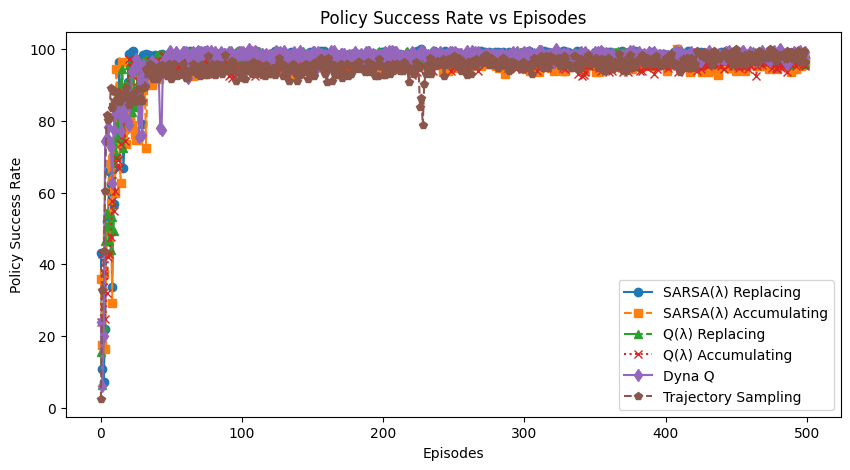

In [24]:
plot_policy_success_rate_together(instances=5, maxEpisodes=50, maxSteps=50, noEpisodes=500)

In [40]:

def plot_expected_return_together(instances=5, maxEpisodes=10, maxSteps=50, noEpisodes=250, discount=0.99):

    env = RandomMaze()
    env.seed(39)
    expected_return = np.zeros((instances, noEpisodes))

    plt.rcParams["figure.figsize"] = (10, 6)

    _, q_value, _ = param(instances, sarsa_lambda, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=True)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            expected_return[i][e] = get_expected_return(env, policy, maxEpisodes=maxEpisodes, maxSteps=maxSteps, discount=discount)
    plt.plot(np.arange(noEpisodes), np.mean(expected_return,axis=0), label='SARSA(λ) Replacing', linestyle='--')

    _, q_value, _ = param(instances, sarsa_lambda, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=False)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            expected_return[i][e] = get_expected_return(env, policy, maxEpisodes=maxEpisodes, maxSteps=maxSteps, discount=discount)
    plt.plot(np.arange(noEpisodes), np.mean(expected_return,axis=0), label='SARSA(λ) Accumulating', linestyle=':')

    _, q_value, _ = param(instances, q_lambda, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=True)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            expected_return[i][e] = get_expected_return(env, policy, maxEpisodes=maxEpisodes, maxSteps=maxSteps, discount=discount)
    plt.plot(np.arange(noEpisodes), np.mean(expected_return,axis=0), label='Q(λ) Replacing', linestyle='-.')

    _, q_value, _ = param(instances, q_lambda, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=False)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            expected_return[i][e] = get_expected_return(env, policy, maxEpisodes=maxEpisodes, maxSteps=maxSteps, discount=discount)
    plt.plot(np.arange(noEpisodes), np.mean(expected_return,axis=0), label='Q(λ) Accumulating', linestyle='-')

    _, q_value, _ = param(instances, dyna_q, average=False, gamma=0.99, alpha=0.05, epsilon=0.3, noEpisodes=noEpisodes, noPlanning=50)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            expected_return[i][e] = get_expected_return(env, policy, maxEpisodes=maxEpisodes, maxSteps=maxSteps, discount=discount)
    plt.plot(np.arange(noEpisodes), np.mean(expected_return,axis=0), label='Dyna Q', linestyle='-')

    _, q_value, _ = param(instances, trajectory_sampling, average=False, gamma=0.99, alpha=0.05, epsilon=0.6, noEpisodes=noEpisodes, maxTrajectory=50)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            expected_return[i][e] = get_expected_return(env, policy, maxEpisodes=maxEpisodes, maxSteps=maxSteps, discount=discount)
    plt.plot(np.arange(noEpisodes), np.mean(expected_return,axis=0), label='Trajectory Sampling', linestyle='-.')

    plt.title('Expected Return vs Episodes')
    plt.xlabel('Episodes')
    plt.ylabel('Expected Return')
    plt.legend()
    plt.show()


  0%|          | 0/5 [00:00<?, ?it/s]<ipython-input-31-9ec61520e2db>:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Q[s][a] += alpha_e*td_error
100%|██████████| 5/5 [00:08<00:00,  1.70s/it]


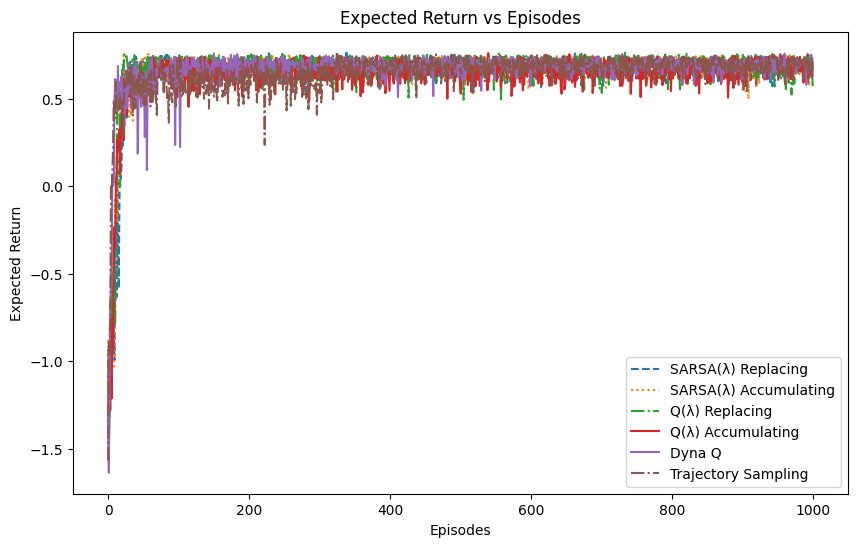

In [43]:
plot_expected_return_together(instances=5, maxEpisodes=10, maxSteps=50, noEpisodes=1000, discount=0.99)

In [38]:
def plot_estimate_error_together(instances=10, maxEpisodes=50, maxSteps=50, noEpisodes=250):
    env = RandomMaze()
    env.seed(38)

    plt.rcParams["figure.figsize"] = (10, 6)
    estimate_errors = np.zeros((instances, noEpisodes))
    true_estimates = [0.82442985, 0.89286374, 0.95464233, 0.0, 0.76427486, 0., 0.68820946, 0.0, 0.69763943, 0.63906528, 0.60613368, 0.38186216]

    # SARSA(λ) Replacing
    state_value, _, _ = param(instances, sarsa_lambda, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=True)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            estimate_errors[i][e] = np.mean(np.abs(state_value[i][e] - true_estimates))
    plt.plot(np.arange(noEpisodes), np.mean(estimate_errors, axis=0), label='SARSA(λ) Replacing', linestyle='-', color='blue')

    # SARSA(λ) Accumulating
    state_value, _, _ = param(instances, sarsa_lambda, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=False)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            estimate_errors[i][e] = np.mean(np.abs(state_value[i][e] - true_estimates))
    plt.plot(np.arange(noEpisodes), np.mean(estimate_errors, axis=0), label='SARSA(λ) Accumulating', linestyle='--', color='red')

    # Q(λ) Replacing
    state_value, _, _ = param(instances, q_lambda, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=True)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            estimate_errors[i][e] = np.mean(np.abs(state_value[i][e] - true_estimates))
    plt.plot(np.arange(noEpisodes), np.mean(estimate_errors, axis=0), label='Q(λ) Replacing', linestyle='-.', color='green')

    # Q(λ) Accumulating
    state_value, _, _ = param(instances, q_lambda, average=False, gamma=0.99, alpha=0.5, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=False)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            estimate_errors[i][e] = np.mean(np.abs(state_value[i][e] - true_estimates))
    plt.plot(np.arange(noEpisodes), np.mean(estimate_errors, axis=0), label='Q(λ) Accumulating', linestyle=':', color='orange')

    # Dyna Q
    state_value, _, _ = param(instances, dyna_q, average=False, gamma=0.99, alpha=0.05, epsilon=0.3, noEpisodes=noEpisodes, noPlanning=50)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            estimate_errors[i][e] = np.mean(np.abs(state_value[i][e] - true_estimates))
    plt.plot(np.arange(noEpisodes), np.mean(estimate_errors, axis=0), label='Dyna Q', linestyle='-', color='purple')

    # Trajectory Sampling
    state_value, _, _ = param(instances, trajectory_sampling, average=False, gamma=0.99, alpha=0.05, epsilon=0.6, noEpisodes=noEpisodes, maxTrajectory=50)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            estimate_errors[i][e] = np.mean(np.abs(state_value[i][e] - true_estimates))
    plt.plot(np.arange(noEpisodes), np.mean(estimate_errors, axis=0), label='Trajectory Sampling', linestyle='--', color='brown')

    plt.title('Estimated Mean State Value Error vs Episodes')
    plt.xlabel('Episodes')
    plt.ylabel('Mean State Value Error')
    plt.legend()
    plt.grid(True)
    plt.show()


  0%|          | 0/5 [00:00<?, ?it/s]<ipython-input-31-9ec61520e2db>:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Q[s][a] += alpha_e*td_error
100%|██████████| 5/5 [00:00<00:00, 145.07it/s]


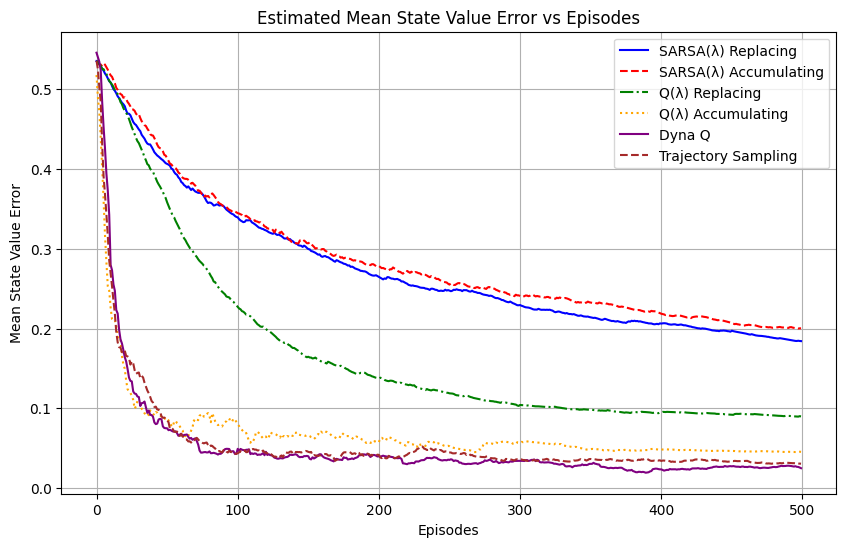

In [39]:
plot_estimate_error_together(instances=5, maxEpisodes=50, maxSteps=50, noEpisodes=500)